## 피마 인디언 데이터 분석하기 ( 비만은 유전인가?)

### pandas를 활용한 데이터 조사

- x_data = 속성
- y_data = 클래스

In [1]:
import numpy as np


In [10]:
import pandas as pd


df = pd.read_csv('C:\\Users\\user\\study1\\머신러닝\\data\\pima-indians-diabetes.csv',
                names = ['pregnant', 'plasma','pressure', ' thickness', 'insulin',
                        'BMI', 'pedigree','age','class'])

# names라는 함수를 통해 각 속성별 키워드를 지정해 줌


In [4]:
df

,pragnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.head(5)

,pragnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
#정보확인
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pragnant    768 non-null    int64  
 1   plasma      768 non-null    int64  
 2   pressure    768 non-null    int64  
 3    thickness  768 non-null    int64  
 4   insulin     768 non-null    int64  
 5   BMI         768 non-null    float64
 6   pedigree    768 non-null    float64
 7   age         768 non-null    int64  
 8   class       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe()

,pragnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
df[['pregnant','class']]

,pregnant,class
0,6,1
1,1,0
2,8,1
3,1,0
4,0,1
...,...,...
763,10,0
764,2,0
765,5,0
766,1,1


as_index = False pragnent 변수 옆에 새로운 인덱스를 만들어줌

In [16]:
# 임신횟수와 당뇨병 발병 확률 계산

print(df[['pregnant','class']].groupby(['pregnant'],
                                      as_index = False).mean().sort_values(by='pregnant',ascending = True))



    pregnant     class
0          0  0.342342
1          1  0.214815
2          2  0.184466
3          3  0.360000
4          4  0.338235
5          5  0.368421
6          6  0.320000
7          7  0.555556
8          8  0.578947
9          9  0.642857
10        10  0.416667
11        11  0.636364
12        12  0.444444
13        13  0.500000
14        14  1.000000
15        15  1.000000
16        17  1.000000


### matplotlib로 그래프 그리기

In [19]:
! pip install seaborn

  Using cached seaborn-0.10.1-py3-none-any.whl (215 kB)


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
plt.figure(figsize = (12,12))

<Figure size 864x864 with 0 Axes>

<Figure size 864x864 with 0 Axes>

- df.corr()  =data
- linewidths =각 셀을 구분할 선의 굵기
- vmax, vmin =컬러 맵을 고정하는 값
- cmap =데이터 값에서 샛 공간으로의 매핑, 설정하지 않으면 기본값은 중심여부에 따라 다르다.
- line color =구분선 색상
- annot = Data 값을 각 셀에 표시한다.

<AxesSubplot:>

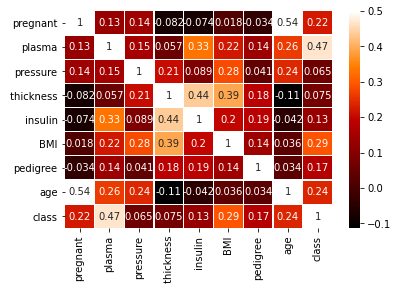

In [25]:
sns.heatmap(df.corr(),linewidths=0.1, vmax = 0.5, cmap = plt.cm.gist_heat,
           linecolor = 'white', annot = True)

- 상관관계는 -1에서 1사이에서 표현한다.
- df.corr()  판다에서 상관관계를 나타내려면 corr()을 이용한다.
- 숫자가 높을수록 밝은 색상으로 채워져있음
- plasma(공복 혈당 농도)가 class(당뇨 발병) 과 가장 상관관계가 높다.

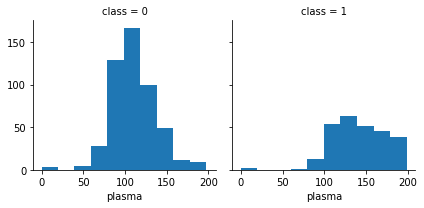

In [29]:
# plasma 정보와 class의 상관관계

grid = sns.FacetGrid(df, col = 'class')
grid.map(plt.hist, 'plasma', bins = 10)
plt.show()

- 당뇨병 환자의 경우 plasma항목의 수치가 150이상인 경우가 많다.

#### Seaborn Grid
- Seaborn에서 Multi-plot grid로 조건부 관계를 여러가지를 동시에 플롯팅 할 수 있는 것을 의미한다.

- FacetGrid, PairGrid, JointGrid 이렇게 세 가지 정도로 나눌 수 있다.
- FacetGrid(data, row, col, hue) : 다중 플롯 그리드를 만들어서 여러가지 쌍 관계를 표현하기 위한 그리드 Class이다. 도화지에 축을 나누는것과 같다. 
- acetgrid = 객체에 map함수를 이용해서 어떻게 그래프를 그릴지


## 피마 인디언의 당뇨병 예측하기



라이브러리 내부 랜덤 함수가 추가로 작동할 경우 100% 같은 값이 나오는 것을
보장할 수 없음

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy
import tensorflow as tf


# seed 값 생성

seed = 0
numpy.random.seed(seed)
tf.random.set_seed(seed)

# 데이터 로드

dataset = numpy.loadtxt('C:\\Users\\user\\study1\\머신러닝\\data\\pima-indians-diabetes.csv',delimiter = ',')
X = dataset[:,0:8]
Y = dataset[:,8]


model = Sequential()
model.add(Dense(12, input_dim = 8, activation = 'relu'))
model.add(Dense(8, activation ='relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

model.fit(X,Y, epochs = 200, batch_size = 10)

print('\n Accuracy: %.4f'%(model.evaluate(X,Y)[1]))


Train on 768 samples
Epoch 1/200
768/768 [==============================] - 0s 536us/sample - loss: 7.1497 - accuracy: 0.6224
Epoch 2/200
768/768 [==============================] - 0s 88us/sample - loss: 2.1107 - accuracy: 0.6393
Epoch 3/200
768/768 [==============================] - 0s 92us/sample - loss: 1.3271 - accuracy: 0.6068
Epoch 4/200
768/768 [==============================] - 0s 88us/sample - loss: 1.0484 - accuracy: 0.6172
Epoch 5/200
768/768 [==============================] - 0s 90us/sample - loss: 0.8735 - accuracy: 0.6133
Epoch 6/200
768/768 [==============================] - 0s 89us/sample - loss: 0.7920 - accuracy: 0.6198
Epoch 7/200
768/768 [==============================] - 0s 92us/sample - loss: 0.7347 - accuracy: 0.6224
Epoch 8/200
768/768 [==============================] - 0s 89us/sample - loss: 0.6908 - accuracy: 0.6406
Epoch 9/200
768/768 [==============================] - 0s 93us/sample - loss: 0.6772 - accuracy: 0.6549
Epoch 10/200
768/768 [====================

768/768 [==============================] - 0s 90us/sample - loss: 0.5463 - accuracy: 0.6914
Epoch 156/200
768/768 [==============================] - 0s 88us/sample - loss: 0.5471 - accuracy: 0.6940
Epoch 157/200
768/768 [==============================] - 0s 89us/sample - loss: 0.5531 - accuracy: 0.6875
Epoch 158/200
768/768 [==============================] - 0s 88us/sample - loss: 0.5413 - accuracy: 0.7018
Epoch 159/200
768/768 [==============================] - 0s 87us/sample - loss: 0.5563 - accuracy: 0.6836
Epoch 160/200
768/768 [==============================] - 0s 87us/sample - loss: 0.5525 - accuracy: 0.6940
Epoch 161/200
768/768 [==============================] - 0s 87us/sample - loss: 0.5465 - accuracy: 0.7018
Epoch 162/200
768/768 [==============================] - 0s 87us/sample - loss: 0.5496 - accuracy: 0.7057
Epoch 163/200
768/768 [==============================] - 0s 88us/sample - loss: 0.5463 - accuracy: 0.6914
Epoch 164/200
768/768 [==============================] - 0s 

- model.add(Dense(12, input_dim = 8, activation = 'relu'))
- 8개 뉴런을 입력받아 12개 함수를 출력
- model.add(Dense(8, activation ='relu'))
- 12개 뉴런을 입력받아 8개 뉴런을 출력
- model.add(Dense(1, activation = 'sigmoid'))
- 8개 뉴런을 입력받아 1개의 뉴런을 sigmoid함수로 출력

- model.fit()
- epochs = epochs가 20이면 한 문제를 20번 시행한다.
- batch_size = 10이라면 총 개수 중 10개씩마다 결과를 보고 가중치를 갱신한다.

In [45]:
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(seed)

# 데이터 로드

dataset = numpy.loadtxt('C:\\Users\\user\\study1\\머신러닝\\data\\pima-indians-diabetes.csv',delimiter = ',')
X = dataset[:,0:8]
Y = dataset[:,8]


model = Sequential()
model.add(Dense(12, input_dim = 8, activation = 'relu'))
model.add(Dense(10, activation ='relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

model.fit(X,Y, epochs = 500, batch_size = 32)

print('\n Accuracy: %.4f'%(model.evaluate(X,Y)[1]))


Train on 768 samples
Epoch 1/500
768/768 [==============================] - 0s 514us/sample - loss: 1.9489 - accuracy: 0.6497
Epoch 2/500
768/768 [==============================] - 0s 36us/sample - loss: 0.7998 - accuracy: 0.5117
Epoch 3/500
768/768 [==============================] - 0s 32us/sample - loss: 0.6999 - accuracy: 0.4661
Epoch 4/500
768/768 [==============================] - 0s 31us/sample - loss: 0.6875 - accuracy: 0.6042
Epoch 5/500
768/768 [==============================] - 0s 34us/sample - loss: 0.6812 - accuracy: 0.6562
Epoch 6/500
768/768 [==============================] - 0s 37us/sample - loss: 0.6771 - accuracy: 0.6510
Epoch 7/500
768/768 [==============================] - 0s 35us/sample - loss: 0.6714 - accuracy: 0.6510
Epoch 8/500
768/768 [==============================] - 0s 34us/sample - loss: 0.6661 - accuracy: 0.6510
Epoch 9/500
768/768 [==============================] - 0s 34us/sample - loss: 0.6621 - accuracy: 0.6510
Epoch 10/500
768/768 [====================

768/768 [==============================] - 0s 32us/sample - loss: 0.4157 - accuracy: 0.8138
Epoch 156/500
768/768 [==============================] - 0s 31us/sample - loss: 0.4309 - accuracy: 0.8034
Epoch 157/500
768/768 [==============================] - 0s 33us/sample - loss: 0.4173 - accuracy: 0.8099
Epoch 158/500
768/768 [==============================] - 0s 32us/sample - loss: 0.4167 - accuracy: 0.8099
Epoch 159/500
768/768 [==============================] - 0s 33us/sample - loss: 0.4136 - accuracy: 0.8047
Epoch 160/500
768/768 [==============================] - 0s 31us/sample - loss: 0.4159 - accuracy: 0.8099
Epoch 161/500
768/768 [==============================] - 0s 36us/sample - loss: 0.4097 - accuracy: 0.8151
Epoch 162/500
768/768 [==============================] - 0s 33us/sample - loss: 0.4203 - accuracy: 0.8073
Epoch 163/500
768/768 [==============================] - 0s 33us/sample - loss: 0.4169 - accuracy: 0.8034
Epoch 164/500
768/768 [==============================] - 0s 

768/768 [==============================] - 0s 30us/sample - loss: 0.3949 - accuracy: 0.8086
Epoch 310/500
768/768 [==============================] - 0s 33us/sample - loss: 0.3756 - accuracy: 0.8268
Epoch 311/500
768/768 [==============================] - 0s 31us/sample - loss: 0.3741 - accuracy: 0.8242
Epoch 312/500
768/768 [==============================] - 0s 34us/sample - loss: 0.3750 - accuracy: 0.8203
Epoch 313/500
768/768 [==============================] - 0s 33us/sample - loss: 0.3649 - accuracy: 0.8333
Epoch 314/500
768/768 [==============================] - 0s 34us/sample - loss: 0.3694 - accuracy: 0.8268
Epoch 315/500
768/768 [==============================] - 0s 33us/sample - loss: 0.3707 - accuracy: 0.8242
Epoch 316/500
768/768 [==============================] - 0s 34us/sample - loss: 0.3748 - accuracy: 0.8216
Epoch 317/500
768/768 [==============================] - 0s 31us/sample - loss: 0.3760 - accuracy: 0.8242
Epoch 318/500
768/768 [==============================] - 0s 

768/768 [==============================] - 0s 35us/sample - loss: 0.3571 - accuracy: 0.8281
Epoch 464/500
768/768 [==============================] - 0s 36us/sample - loss: 0.3537 - accuracy: 0.8346
Epoch 465/500
768/768 [==============================] - 0s 36us/sample - loss: 0.3575 - accuracy: 0.8320
Epoch 466/500
768/768 [==============================] - 0s 34us/sample - loss: 0.3617 - accuracy: 0.8281
Epoch 467/500
768/768 [==============================] - 0s 35us/sample - loss: 0.3583 - accuracy: 0.8320
Epoch 468/500
768/768 [==============================] - 0s 35us/sample - loss: 0.3552 - accuracy: 0.8411
Epoch 469/500
768/768 [==============================] - 0s 34us/sample - loss: 0.3580 - accuracy: 0.8229
Epoch 470/500
768/768 [==============================] - 0s 35us/sample - loss: 0.3536 - accuracy: 0.8333
Epoch 471/500
768/768 [==============================] - 0s 35us/sample - loss: 0.3626 - accuracy: 0.8307
Epoch 472/500
768/768 [==============================] - 0s 

#### batch_size 크기에 따른 학습영향

- 배치 : 모델학습의 반복 1회, 즉 경사 업데이트 1회에 사용되는 예의 집합
- 배치크기 : 배치 하나에 포함되는 예의 개수, 예를 들어 SGD의 배치 크기는 1이고, 미니 배치의 배치 크기를 일반적으로 10~ 1000이다.
- 배치 크기가 충분히 크면 전체 데이터 세트의 기울기가 무엇인지에 대한 안정적인 추정치를 제공한다.
- 데이터 세트에서 샘플을 가져와서 계산 비용을 크게 줄이면서 기울기를 추정할 수 있다.
- 데이터에 노이즈가 있고 학습할 수 없거나 매우 느리게 수렴되어 전체 계산 시간에 부정적인 영향을 미치면 네트워크 가중치가 급격히 증가할 수 있다.
- 너무 큰 배치 크기를 사용하면 기울기 하강의 확률을 감소시킬 수 있으므로 훈련 중 네트워크 정확도에 부정적인 영향을 줄 수 있다.


## 다중 분류 문제
- 클래스가 2개가 아니라 3개
- 즉 , 참(1) 거짓(0)으로 해결하는 것이 아니라, 여러 개 중에 어떤 것이 답인지를 예측하는 문제

In [46]:
import pandas as pd
df = pd.read_csv('C:\\Users\\user\\study1\\머신러닝\\data\\iris.csv', names = ['sepal_length',
                                                                     'sepal_width','petal_length',' petal_width','species'])
print(df.head())


   sepal_length  sepal_width  petal_length   petal_width      species
0           5.1          3.5           1.4           0.2  Iris-setosa
1           4.9          3.0           1.4           0.2  Iris-setosa
2           4.7          3.2           1.3           0.2  Iris-setosa
3           4.6          3.1           1.5           0.2  Iris-setosa
4           5.0          3.6           1.4           0.2  Iris-setosa


## 시각화

### pairplot( ) 함수

- 데이터 분포 그래프
- hue 옵션으로 특정 항목을 기준으로 색 분류

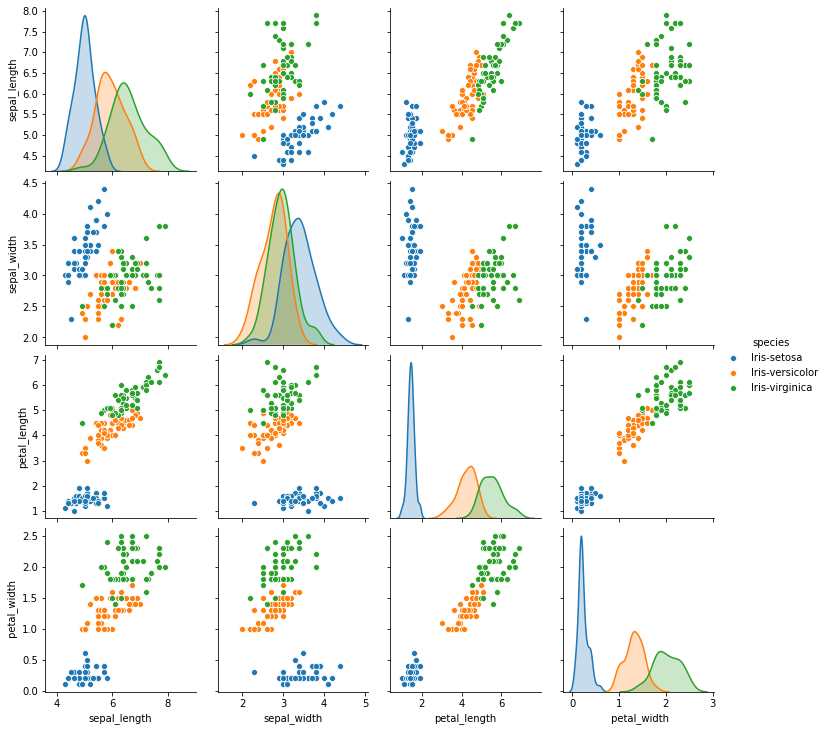

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue = 'species')
plt.show()

In [14]:
tf.__version__

'2.3.0'

In [58]:
! pip install keras

  Using cached Keras-2.4.3-py2.py3-none-any.whl (36 kB)
  Using cached PyYAML-5.3.1-cp37-cp37m-win_amd64.whl (216 kB)


In [65]:
tf.__version__

'2.1.0'

In [12]:
!pip install sklearn

  Using cached threadpoolctl-2.1.0-py3-none-any.whl (12 kB)
  Using cached joblib-0.16.0-py3-none-any.whl (300 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1320 sha256=a8ef7b2572322829ab369a187c9e83c0bf3ff4a5386aff443e8957da0f39d235
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\46\ef\c3\157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


## 아이리스 품종 예측 실행

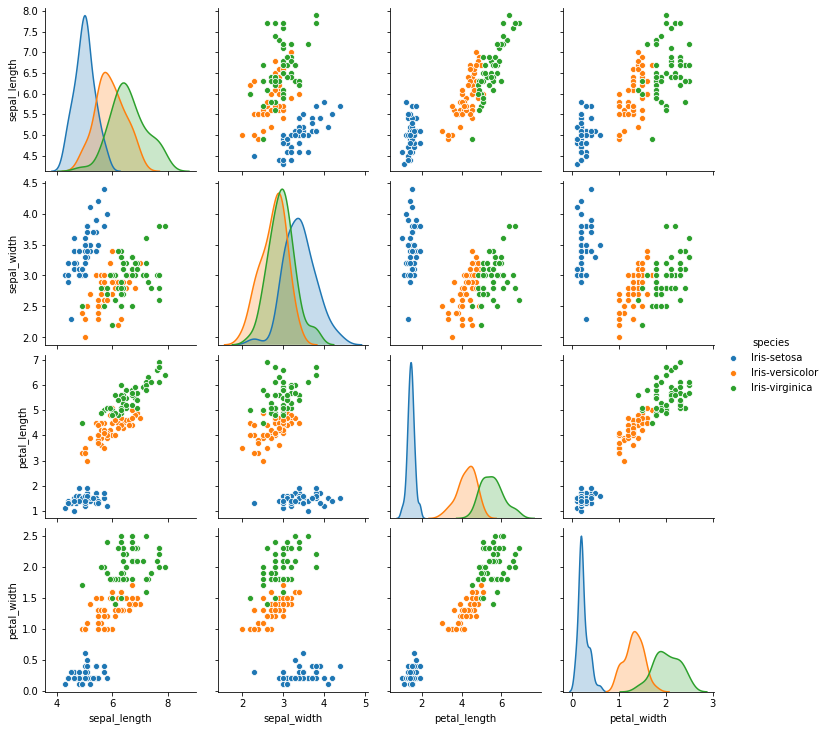

Epoch 1/50
150/150 [==============================] - 0s 551us/step - loss: 1.6271 - accuracy: 0.5533
Epoch 2/50
150/150 [==============================] - 0s 512us/step - loss: 0.6383 - accuracy: 0.7000
Epoch 3/50
150/150 [==============================] - 0s 530us/step - loss: 0.5596 - accuracy: 0.7733
Epoch 4/50
150/150 [==============================] - 0s 518us/step - loss: 0.4948 - accuracy: 0.8200
Epoch 5/50
150/150 [==============================] - 0s 454us/step - loss: 0.4555 - accuracy: 0.8133
Epoch 6/50
150/150 [==============================] - 0s 479us/step - loss: 0.4224 - accuracy: 0.8867
Epoch 7/50
150/150 [==============================] - 0s 463us/step - loss: 0.3882 - accuracy: 0.9000
Epoch 8/50
150/150 [==============================] - 0s 532us/step - loss: 0.3627 - accuracy: 0.8933
Epoch 9/50
150/150 [==============================] - 0s 520us/step - loss: 0.3512 - accuracy: 0.9067
Epoch 10/50
150/150 [==============================] - 0s 539us/step - loss: 0.325

In [20]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy
import tensorflow as tf

seed = 0
numpy.random.seed(seed)
tf.random.set_seed(seed)


df = pd.read_csv('C:\\Users\\user\\study1\\머신러닝\\data\\iris.csv', 
                 names = ['sepal_length', 'sepal_width','petal_length','petal_width','species'])

sns.pairplot(df, hue = 'species')
plt. show()

dataset= df.values 

# 속성 
X = dataset[:,0:4].astype(float)
# 클래스
Y_obj =  dataset[:, 4]


# Y값이 숫자가 아니고 문자열이므로 LabelRncoder로 순서대로 1,2,3으로 숫자로 지정함
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
# array([1,2,3])을  array([[1,0,0],[0,1,0],[0,0,1]])로 변경해주기
Y_encoded = np_utils.to_categorical(Y)


# 모델 설정
model = Sequential()
model.add(Dense(16, input_dim = 4, activation = 'relu'))
# 최종 출력값이 3개 중 하나여야 하므로 출력층에 해당하는 Dense의 노트수를 3으로 설정한다.
# 또한 활성화 함수로 앞서 나오지 않았던 다중 분석을 위한 소프트맥수 함수를 사용하낟.
# 총합이 1인 형태로 바꿔서 계산해 준다.
model.add(Dense(3, activation = 'softmax'))

#모델 컴파일
# adam 안에 learning_rate 는 0.01
model.compile(loss = 'categorical_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

# 모델 실행
# 전체 입력수는 50개 한번에 입력되는 값은 1개
model.fit(X, Y_encoded, epochs = 50, batch_size =1)

# 결과 출력
print('\n Accuracy : %.4f'%(model.evaluate(X, Y_encoded)[1]))

#### 이항분류(T or F) 다중분류(class가 3개 이상)


### softmax 

- 입력에서 가중합을 더한 값이 소프트맥스를 거치면 총합이 항상 1인 형태가 된다.
- 큰값이 더 두드러지게 나타나고 작은 값은 더 작아진다.
- 이값이 교차 엔트로피를 지나 1,0,0식으로 우리가 원하는 원-핫 인코딩 값, 즉 하나만 1이고 나머지는 0인 값으로 변한다.
 

## 과적합 피하기

### 초음파 광물 예측

In [22]:
import pandas as pd

df = pd.read_csv('C:\\Users\\user\\study1\\머신러닝\\data\\sonar.csv', header = None)
print(df.info())

# 총 61열 #속성이 60개 # 클래스가 1개

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [23]:
print(df.head())
# 마지막이 문자열이기에 변환이 필요하다.

       0       1       2       3       4       5       6       7       8   \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       9   ...      51      52      53      54      55      56      57  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

       58      59  60  
0  0.0090  0.0032   R  
1  0.0052  0.0044   R  
2  0.0095  0.0078   

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy 
import tensorflow as tf

seed = 0
numpy.random.seed(seed)
tf.random.set_seed(seed)

df = pd.read_csv('C:\\Users\\user\\study1\\머신러닝\\data\\sonar.csv', header = None)

dataset = df.values 
X = dataset[:,0:60].astype(float)
Y_obj = dataset[:,60]

# 문자열 변환
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

# 모델 설정
model = Sequential()
model.add(Dense(24, input_dim = 60, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

#모델 컴파일
model.compile(loss = 'mean_squared_error',
             optimizer = 'adam',
             metrics = ['accuracy'])

model.fit(X,Y, epochs = 200, batch_size = 5)

print('\n Accuracy = %.4f' % (model.evaluate(X,Y)[1]))

Epoch 1/200
42/42 [==============================] - 0s 641us/step - loss: 0.2468 - accuracy: 0.5096
Epoch 2/200
42/42 [==============================] - 0s 642us/step - loss: 0.2269 - accuracy: 0.6971
Epoch 3/200
42/42 [==============================] - 0s 691us/step - loss: 0.2153 - accuracy: 0.7115
Epoch 4/200
42/42 [==============================] - 0s 704us/step - loss: 0.2048 - accuracy: 0.7115
Epoch 5/200
42/42 [==============================] - 0s 667us/step - loss: 0.1969 - accuracy: 0.7260
Epoch 6/200
42/42 [==============================] - 0s 741us/step - loss: 0.1871 - accuracy: 0.7692
Epoch 7/200
42/42 [==============================] - 0s 697us/step - loss: 0.1768 - accuracy: 0.7788
Epoch 8/200
42/42 [==============================] - 0s 709us/step - loss: 0.1715 - accuracy: 0.7837
Epoch 9/200
42/42 [==============================] - 0s 662us/step - loss: 0.1620 - accuracy: 0.8125
Epoch 10/200
42/42 [==============================] - 0s 708us/step - loss: 0.1619 - accura

Epoch 81/200
42/42 [==============================] - 0s 713us/step - loss: 0.0599 - accuracy: 0.9423
Epoch 82/200
42/42 [==============================] - 0s 690us/step - loss: 0.0599 - accuracy: 0.9423
Epoch 83/200
42/42 [==============================] - 0s 658us/step - loss: 0.0634 - accuracy: 0.9375
Epoch 84/200
42/42 [==============================] - 0s 688us/step - loss: 0.0574 - accuracy: 0.9471
Epoch 85/200
42/42 [==============================] - 0s 695us/step - loss: 0.0563 - accuracy: 0.9423
Epoch 86/200
42/42 [==============================] - 0s 594us/step - loss: 0.0569 - accuracy: 0.9327
Epoch 87/200
42/42 [==============================] - 0s 566us/step - loss: 0.0542 - accuracy: 0.9471
Epoch 88/200
42/42 [==============================] - 0s 554us/step - loss: 0.0566 - accuracy: 0.9375
Epoch 89/200
42/42 [==============================] - 0s 493us/step - loss: 0.0535 - accuracy: 0.9423
Epoch 90/200
42/42 [==============================] - 0s 730us/step - loss: 0.0526

42/42 [==============================] - 0s 706us/step - loss: 0.0168 - accuracy: 0.9856
Epoch 161/200
42/42 [==============================] - 0s 690us/step - loss: 0.0158 - accuracy: 0.9856
Epoch 162/200
42/42 [==============================] - 0s 678us/step - loss: 0.0146 - accuracy: 0.9856
Epoch 163/200
42/42 [==============================] - 0s 688us/step - loss: 0.0148 - accuracy: 0.9856
Epoch 164/200
42/42 [==============================] - 0s 679us/step - loss: 0.0157 - accuracy: 0.9856
Epoch 165/200
42/42 [==============================] - 0s 725us/step - loss: 0.0145 - accuracy: 0.9856
Epoch 166/200
42/42 [==============================] - 0s 670us/step - loss: 0.0144 - accuracy: 0.9856
Epoch 167/200
42/42 [==============================] - 0s 636us/step - loss: 0.0128 - accuracy: 0.9904
Epoch 168/200
42/42 [==============================] - 0s 681us/step - loss: 0.0142 - accuracy: 0.9952
Epoch 169/200
42/42 [==============================] - 0s 622us/step - loss: 0.0134 - a

- kereas는 epochs를 많이 주고 과적합을 만나면 스스로 멈춤
- 과적합은 층이 너무 많거나, 변수가 너무 복잡해서 발생하기도 하고 테스트셋과 학습셋이 중복될 때 생기기도 한다.
- 데이터셋 100개 -> 70개 학습셋, 30개 테스트셋 
- 학습된 결과를 저장한 것은 model이라고 한다.
- 학습셋으로 모델을 만들고 테스트 셋을 입력해 나오는 모델을 실제 데이터에 적용한다.
- 학습셋 내부에서 성공률이 높지만, 테스트셋에서는 효과가 없다면 과적합이 일어나고 있는 것이다.

## 학습셋과 테스트셋

### 주어진 데이터를 학습셋과 테스트셋으로 나누는 예제 만들기

In [38]:
from sklearn.model_selection import train_test_split


# test_size : 테스트 셋 구성의 비율
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3,
                                                   random_state = seed)


model.fit(X_train, Y_train, epochs = 130, batch_size = 5)


print('\n Test Accuracy : %.4f' % (model.evaluate(X_test,Y_test)[1]))


Epoch 1/130
29/29 [==============================] - 0s 836us/step - loss: 0.0033 - accuracy: 1.0000
Epoch 2/130
29/29 [==============================] - 0s 873us/step - loss: 0.0034 - accuracy: 1.0000
Epoch 3/130
29/29 [==============================] - 0s 869us/step - loss: 0.0035 - accuracy: 1.0000
Epoch 4/130
29/29 [==============================] - 0s 949us/step - loss: 0.0032 - accuracy: 1.0000
Epoch 5/130
29/29 [==============================] - 0s 947us/step - loss: 0.0026 - accuracy: 1.0000
Epoch 6/130
29/29 [==============================] - 0s 948us/step - loss: 0.0030 - accuracy: 1.0000
Epoch 7/130
29/29 [==============================] - 0s 968us/step - loss: 0.0029 - accuracy: 1.0000
Epoch 8/130
29/29 [==============================] - 0s 962us/step - loss: 0.0031 - accuracy: 1.0000
Epoch 9/130
29/29 [==============================] - 0s 902us/step - loss: 0.0027 - accuracy: 1.0000
Epoch 10/130
29/29 [==============================] - 0s 954us/step - loss: 0.0022 - accura

29/29 [==============================] - 0s 940us/step - loss: 4.0638e-04 - accuracy: 1.0000
Epoch 81/130
29/29 [==============================] - 0s 928us/step - loss: 4.7343e-04 - accuracy: 1.0000
Epoch 82/130
29/29 [==============================] - 0s 900us/step - loss: 3.9170e-04 - accuracy: 1.0000
Epoch 83/130
29/29 [==============================] - 0s 861us/step - loss: 3.9624e-04 - accuracy: 1.0000
Epoch 84/130
29/29 [==============================] - 0s 871us/step - loss: 3.8197e-04 - accuracy: 1.0000
Epoch 85/130
29/29 [==============================] - 0s 903us/step - loss: 3.7683e-04 - accuracy: 1.0000
Epoch 86/130
29/29 [==============================] - 0s 901us/step - loss: 3.5881e-04 - accuracy: 1.0000
Epoch 87/130
29/29 [==============================] - 0s 879us/step - loss: 4.0600e-04 - accuracy: 1.0000
Epoch 88/130
29/29 [==============================] - 0s 929us/step - loss: 3.7853e-04 - accuracy: 1.0000
Epoch 89/130
29/29 [==============================] - 0s 97

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# categorical Variable을 수치화시키기
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy 
import tensorflow as tf

seed = 0
numpy.random.seed(seed)
tf.random.set_seed(seed)

df = pd.read_csv('C:\\Users\\user\\study1\\머신러닝\\data\\sonar.csv', header = None)

dataset = df.values 
X = dataset[:,0:60].astype(float)
Y_obj = dataset[:,60]

# 문자열 변환
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

# 모델 설정
model = Sequential()
model.add(Dense(24, input_dim = 60, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

#모델 컴파일
model.compile(loss = 'mean_squared_error',
             optimizer = 'adam',
             metrics = ['accuracy'])

from sklearn.model_selection import train_test_split


# test_size : 테스트 셋 구성의 비율
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3,
                                                   random_state = seed)


model.fit(X_train, Y_train, epochs = 130, batch_size = 5)


print('\n Test Accuracy : %.4f' % (model.evaluate(X_test,Y_test)[1]))

Epoch 1/130
29/29 [==============================] - 0s 618us/step - loss: 0.2459 - accuracy: 0.5310
Epoch 2/130
29/29 [==============================] - 0s 668us/step - loss: 0.2303 - accuracy: 0.6414
Epoch 3/130
29/29 [==============================] - 0s 578us/step - loss: 0.2199 - accuracy: 0.6828
Epoch 4/130
29/29 [==============================] - 0s 676us/step - loss: 0.2102 - accuracy: 0.7724
Epoch 5/130
29/29 [==============================] - 0s 653us/step - loss: 0.2038 - accuracy: 0.6966
Epoch 6/130
29/29 [==============================] - 0s 694us/step - loss: 0.1952 - accuracy: 0.7517
Epoch 7/130
29/29 [==============================] - 0s 689us/step - loss: 0.1882 - accuracy: 0.7724
Epoch 8/130
29/29 [==============================] - 0s 650us/step - loss: 0.1881 - accuracy: 0.7034
Epoch 9/130
29/29 [==============================] - 0s 688us/step - loss: 0.1752 - accuracy: 0.8069
Epoch 10/130
29/29 [==============================] - 0s 644us/step - loss: 0.1695 - accura

Epoch 81/130
29/29 [==============================] - 0s 650us/step - loss: 0.0408 - accuracy: 0.9655
Epoch 82/130
29/29 [==============================] - 0s 668us/step - loss: 0.0394 - accuracy: 0.9655
Epoch 83/130
29/29 [==============================] - 0s 660us/step - loss: 0.0386 - accuracy: 0.9655
Epoch 84/130
29/29 [==============================] - 0s 582us/step - loss: 0.0374 - accuracy: 0.9655
Epoch 85/130
29/29 [==============================] - 0s 590us/step - loss: 0.0388 - accuracy: 0.9655
Epoch 86/130
29/29 [==============================] - 0s 685us/step - loss: 0.0358 - accuracy: 0.9655
Epoch 87/130
29/29 [==============================] - 0s 613us/step - loss: 0.0374 - accuracy: 0.9862
Epoch 88/130
29/29 [==============================] - 0s 635us/step - loss: 0.0360 - accuracy: 0.9655
Epoch 89/130
29/29 [==============================] - 0s 639us/step - loss: 0.0324 - accuracy: 0.9931
Epoch 90/130
29/29 [==============================] - 0s 677us/step - loss: 0.0318

## 모델 저장과 재사용
- 학습이 끝난 후 테스트 결과가 만족스러울 경우 이를 모델로 저장해 새로운 데이터에 사용할 수 있다.

In [41]:
from keras.models import load_model

# 모델 저장하기
# layer. node, 각 레이어별 가중치와 바이어스가 저장이 됨.
model.save('my_model.h5') 

In [42]:
# 모델 불러오기
model = load_model('my_model.h5')

In [ ]:
model.compile(loss)

## k겹 교차 검증
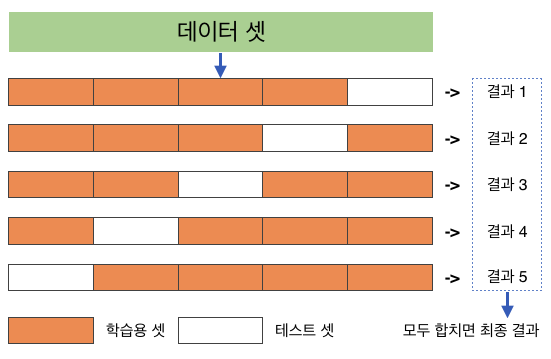
- 데이터 셋이 충분하지 못할때, 데이터셋을 학습셋과 테스트셋으로 나누게 되면, 테스트 셋의 양이 적은 문제가 있음
- k겹 교차검증 방법 사용하면 단점을 보완할 수 있음.
- ex.데이터셋을 5개로 나누고 학습셋 4개 테스트셋 1개로 나눈다.

In [69]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


import pandas as pd
import numpy




seed = 0
numpy.random.seed(seed)
tf.random.set_seed(seed)

df = pd.read_csv('C:\\Users\\user\\study1\\머신러닝\\data\\sonar.csv', header = None)
dataset = df.values

X = dataset[:,0:60].astype(float)
Y_obj = dataset[:,60]

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)


# 10개의 파일으로 쪼갬
n_fold = 10
skf = StratifiedKFold(n_splits = n_fold, shuffle = True, random_state = seed)

# 빈 Accuracy 배열
accuracy = []

#모델의 설정, 컴파일, 실행
####### for 구문으로 묶어 n_fold만큼 반복되게 함 #######
# skf는 검증이 가능한 데이터셋 (X,y로 구성) -> train, test

for train, test in skf.split(X,Y):
    
    model = Sequential()
    model.add(Dense(14, input_dim= 60, activation = 'relu'))
    model.add(Dense(10, activation ='relu') )
    model.add(Dense(1, activation = 'sigmoid'))    
    model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])
 

    # 주어진 value를 tensor로 변환한다.

    X_train = tf.convert_to_tensor(X[train], dtype = tf.float32)
    Y_train = tf.convert_to_tensor(Y[train], dtype = tf.float32)
    
    # 학습
    model.fit(X_train, Y_train, epochs = 100, batch_size = 5)

    X_test = tf.convert_to_tensor(X[test], dtype = tf.float32)
    Y_test = tf.convert_to_tensor(Y[test], dtype = tf.float32)
    
    # 모델 평가하기
    k_accuracy = '%.4f'%(model.evaluate(X_test, Y_test)[1])

    accuracy.append(k_accuracy)


# 결과출력
print('\n %.f fold accuracy : ' % n_fold, accuracy)




Epoch 1/100
38/38 [==============================] - 0s 641us/step - loss: 0.2446 - accuracy: 0.5348
Epoch 2/100
38/38 [==============================] - 0s 630us/step - loss: 0.2362 - accuracy: 0.5348
Epoch 3/100
38/38 [==============================] - 0s 682us/step - loss: 0.2312 - accuracy: 0.5348
Epoch 4/100
38/38 [==============================] - 0s 698us/step - loss: 0.2253 - accuracy: 0.5401
Epoch 5/100
38/38 [==============================] - 0s 698us/step - loss: 0.2208 - accuracy: 0.5348
Epoch 6/100
38/38 [==============================] - 0s 662us/step - loss: 0.2158 - accuracy: 0.6150
Epoch 7/100
38/38 [==============================] - 0s 709us/step - loss: 0.2072 - accuracy: 0.6417
Epoch 8/100
38/38 [==============================] - 0s 738us/step - loss: 0.1910 - accuracy: 0.7380
Epoch 9/100
38/38 [==============================] - 0s 658us/step - loss: 0.1764 - accuracy: 0.7594
Epoch 10/100
38/38 [==============================] - 0s 735us/step - loss: 0.1660 - accura

38/38 [==============================] - 0s 710us/step - loss: 0.0659 - accuracy: 0.9251
Epoch 82/100
38/38 [==============================] - 0s 655us/step - loss: 0.0604 - accuracy: 0.9519
Epoch 83/100
38/38 [==============================] - 0s 662us/step - loss: 0.0628 - accuracy: 0.9465
Epoch 84/100
38/38 [==============================] - 0s 628us/step - loss: 0.0601 - accuracy: 0.9465
Epoch 85/100
38/38 [==============================] - 0s 662us/step - loss: 0.0656 - accuracy: 0.9305
Epoch 86/100
38/38 [==============================] - 0s 642us/step - loss: 0.0623 - accuracy: 0.9412
Epoch 87/100
38/38 [==============================] - 0s 654us/step - loss: 0.0615 - accuracy: 0.9465
Epoch 88/100
38/38 [==============================] - 0s 628us/step - loss: 0.0635 - accuracy: 0.9305
Epoch 89/100
38/38 [==============================] - 0s 703us/step - loss: 0.0638 - accuracy: 0.9305
Epoch 90/100
38/38 [==============================] - 0s 712us/step - loss: 0.0617 - accuracy: 

38/38 [==============================] - 0s 653us/step - loss: 0.0781 - accuracy: 0.9091
Epoch 59/100
38/38 [==============================] - 0s 669us/step - loss: 0.0770 - accuracy: 0.9144
Epoch 60/100
38/38 [==============================] - 0s 637us/step - loss: 0.0749 - accuracy: 0.9251
Epoch 61/100
38/38 [==============================] - 0s 638us/step - loss: 0.0741 - accuracy: 0.9198
Epoch 62/100
38/38 [==============================] - 0s 666us/step - loss: 0.0739 - accuracy: 0.9198
Epoch 63/100
38/38 [==============================] - 0s 649us/step - loss: 0.0748 - accuracy: 0.9144
Epoch 64/100
38/38 [==============================] - 0s 687us/step - loss: 0.0722 - accuracy: 0.9251
Epoch 65/100
38/38 [==============================] - 0s 665us/step - loss: 0.0700 - accuracy: 0.9251
Epoch 66/100
38/38 [==============================] - 0s 650us/step - loss: 0.0705 - accuracy: 0.9251
Epoch 67/100
38/38 [==============================] - 0s 610us/step - loss: 0.0720 - accuracy: 

38/38 [==============================] - 0s 636us/step - loss: 0.1236 - accuracy: 0.8289
Epoch 38/100
38/38 [==============================] - 0s 649us/step - loss: 0.1315 - accuracy: 0.8235
Epoch 39/100
38/38 [==============================] - 0s 651us/step - loss: 0.1199 - accuracy: 0.8342
Epoch 40/100
38/38 [==============================] - ETA: 0s - loss: 0.1266 - accuracy: 0.80 - 0s 658us/step - loss: 0.1178 - accuracy: 0.8663
Epoch 41/100
38/38 [==============================] - 0s 651us/step - loss: 0.1242 - accuracy: 0.8396
Epoch 42/100
38/38 [==============================] - 0s 655us/step - loss: 0.1194 - accuracy: 0.8235
Epoch 43/100
38/38 [==============================] - 0s 701us/step - loss: 0.1173 - accuracy: 0.8449
Epoch 44/100
38/38 [==============================] - 0s 680us/step - loss: 0.1164 - accuracy: 0.8342
Epoch 45/100
38/38 [==============================] - 0s 692us/step - loss: 0.1140 - accuracy: 0.8770
Epoch 46/100
38/38 [==============================] -

38/38 [==============================] - 0s 596us/step - loss: 0.1588 - accuracy: 0.8128
Epoch 17/100
38/38 [==============================] - 0s 576us/step - loss: 0.1559 - accuracy: 0.7968
Epoch 18/100
38/38 [==============================] - 0s 593us/step - loss: 0.1511 - accuracy: 0.8128
Epoch 19/100
38/38 [==============================] - 0s 567us/step - loss: 0.1455 - accuracy: 0.8342
Epoch 20/100
38/38 [==============================] - 0s 568us/step - loss: 0.1466 - accuracy: 0.8128
Epoch 21/100
38/38 [==============================] - 0s 570us/step - loss: 0.1395 - accuracy: 0.8342
Epoch 22/100
38/38 [==============================] - 0s 541us/step - loss: 0.1353 - accuracy: 0.8449
Epoch 23/100
38/38 [==============================] - 0s 586us/step - loss: 0.1323 - accuracy: 0.8449
Epoch 24/100
38/38 [==============================] - 0s 589us/step - loss: 0.1311 - accuracy: 0.8342
Epoch 25/100
38/38 [==============================] - 0s 571us/step - loss: 0.1306 - accuracy: 

38/38 [==============================] - 0s 573us/step - loss: 0.0437 - accuracy: 0.9519
Epoch 97/100
38/38 [==============================] - 0s 631us/step - loss: 0.0444 - accuracy: 0.9572
Epoch 98/100
38/38 [==============================] - 0s 611us/step - loss: 0.0394 - accuracy: 0.9786
Epoch 99/100
38/38 [==============================] - 0s 592us/step - loss: 0.0422 - accuracy: 0.9626
Epoch 100/100
1/1 [==============================] - 0s 0s/step - loss: 0.0817 - accuracy: 0.9048
Epoch 1/100
38/38 [==============================] - 0s 562us/step - loss: 0.2480 - accuracy: 0.5241
Epoch 2/100
38/38 [==============================] - 0s 576us/step - loss: 0.2409 - accuracy: 0.5989
Epoch 3/100
38/38 [==============================] - 0s 573us/step - loss: 0.2353 - accuracy: 0.6257
Epoch 4/100
38/38 [==============================] - 0s 575us/step - loss: 0.2305 - accuracy: 0.6203
Epoch 5/100
38/38 [==============================] - 0s 550us/step - loss: 0.2244 - accuracy: 0.6738
Ep

38/38 [==============================] - 0s 555us/step - loss: 0.0588 - accuracy: 0.9358
Epoch 68/100
38/38 [==============================] - 0s 525us/step - loss: 0.0520 - accuracy: 0.9519
Epoch 69/100
38/38 [==============================] - 0s 551us/step - loss: 0.0560 - accuracy: 0.9358
Epoch 70/100
38/38 [==============================] - 0s 545us/step - loss: 0.0638 - accuracy: 0.9251
Epoch 71/100
38/38 [==============================] - 0s 603us/step - loss: 0.0583 - accuracy: 0.9198
Epoch 72/100
38/38 [==============================] - 0s 578us/step - loss: 0.0517 - accuracy: 0.9519
Epoch 73/100
38/38 [==============================] - 0s 576us/step - loss: 0.0497 - accuracy: 0.9465
Epoch 74/100
38/38 [==============================] - 0s 573us/step - loss: 0.0510 - accuracy: 0.9412
Epoch 75/100
38/38 [==============================] - 0s 536us/step - loss: 0.0465 - accuracy: 0.9626
Epoch 76/100
38/38 [==============================] - 0s 576us/step - loss: 0.0454 - accuracy: 

38/38 [==============================] - 0s 630us/step - loss: 0.0904 - accuracy: 0.8877
Epoch 40/100
38/38 [==============================] - 0s 599us/step - loss: 0.0862 - accuracy: 0.8877
Epoch 41/100
38/38 [==============================] - 0s 599us/step - loss: 0.0903 - accuracy: 0.8930
Epoch 42/100
38/38 [==============================] - 0s 639us/step - loss: 0.0827 - accuracy: 0.8984
Epoch 43/100
38/38 [==============================] - 0s 603us/step - loss: 0.0883 - accuracy: 0.8984
Epoch 44/100
38/38 [==============================] - 0s 575us/step - loss: 0.0839 - accuracy: 0.8930
Epoch 45/100
38/38 [==============================] - 0s 627us/step - loss: 0.0810 - accuracy: 0.9037
Epoch 46/100
38/38 [==============================] - 0s 628us/step - loss: 0.0787 - accuracy: 0.9144
Epoch 47/100
38/38 [==============================] - 0s 608us/step - loss: 0.0799 - accuracy: 0.8984
Epoch 48/100
38/38 [==============================] - 0s 602us/step - loss: 0.0763 - accuracy: 

38/38 [==============================] - 0s 605us/step - loss: 0.2030 - accuracy: 0.7166
Epoch 11/100
38/38 [==============================] - 0s 581us/step - loss: 0.1996 - accuracy: 0.6791
Epoch 12/100
38/38 [==============================] - 0s 577us/step - loss: 0.1989 - accuracy: 0.7326
Epoch 13/100
38/38 [==============================] - 0s 623us/step - loss: 0.1942 - accuracy: 0.7487
Epoch 14/100
38/38 [==============================] - 0s 595us/step - loss: 0.1882 - accuracy: 0.7380
Epoch 15/100
38/38 [==============================] - 0s 628us/step - loss: 0.1844 - accuracy: 0.7647
Epoch 16/100
38/38 [==============================] - 0s 586us/step - loss: 0.1812 - accuracy: 0.7914
Epoch 17/100
38/38 [==============================] - 0s 590us/step - loss: 0.1783 - accuracy: 0.7861
Epoch 18/100
38/38 [==============================] - 0s 585us/step - loss: 0.1763 - accuracy: 0.7968
Epoch 19/100
38/38 [==============================] - 0s 616us/step - loss: 0.1752 - accuracy: 

38/38 [==============================] - 0s 604us/step - loss: 0.0493 - accuracy: 0.9733
Epoch 91/100
38/38 [==============================] - 0s 576us/step - loss: 0.0497 - accuracy: 0.9679
Epoch 92/100
38/38 [==============================] - 0s 581us/step - loss: 0.0471 - accuracy: 0.9733
Epoch 93/100
38/38 [==============================] - 0s 576us/step - loss: 0.0453 - accuracy: 0.9840
Epoch 94/100
38/38 [==============================] - 0s 610us/step - loss: 0.0462 - accuracy: 0.9786
Epoch 95/100
38/38 [==============================] - 0s 563us/step - loss: 0.0501 - accuracy: 0.9679
Epoch 96/100
38/38 [==============================] - ETA: 0s - loss: 0.0750 - accuracy: 1.00 - 0s 616us/step - loss: 0.0456 - accuracy: 0.9786
Epoch 97/100
38/38 [==============================] - 0s 606us/step - loss: 0.0454 - accuracy: 0.9786
Epoch 98/100
38/38 [==============================] - 0s 601us/step - loss: 0.0445 - accuracy: 0.9786
Epoch 99/100
38/38 [==============================] -

38/38 [==============================] - 0s 657us/step - loss: 0.0598 - accuracy: 0.9412
Epoch 62/100
38/38 [==============================] - 0s 704us/step - loss: 0.0608 - accuracy: 0.9519
Epoch 63/100
38/38 [==============================] - 0s 684us/step - loss: 0.0576 - accuracy: 0.9519
Epoch 64/100
38/38 [==============================] - 0s 711us/step - loss: 0.0540 - accuracy: 0.9626
Epoch 65/100
38/38 [==============================] - 0s 696us/step - loss: 0.0521 - accuracy: 0.9519
Epoch 66/100
38/38 [==============================] - 0s 647us/step - loss: 0.0517 - accuracy: 0.9572
Epoch 67/100
38/38 [==============================] - 0s 674us/step - loss: 0.0570 - accuracy: 0.9412
Epoch 68/100
38/38 [==============================] - 0s 674us/step - loss: 0.0489 - accuracy: 0.9626
Epoch 69/100
38/38 [==============================] - 0s 627us/step - loss: 0.0479 - accuracy: 0.9626
Epoch 70/100
38/38 [==============================] - 0s 623us/step - loss: 0.0561 - accuracy: 

38/38 [==============================] - 0s 557us/step - loss: 0.1267 - accuracy: 0.8245
Epoch 31/100
38/38 [==============================] - 0s 500us/step - loss: 0.1258 - accuracy: 0.8457
Epoch 32/100
38/38 [==============================] - 0s 582us/step - loss: 0.1208 - accuracy: 0.8457
Epoch 33/100
38/38 [==============================] - 0s 596us/step - loss: 0.1164 - accuracy: 0.8511
Epoch 34/100
38/38 [==============================] - 0s 580us/step - loss: 0.1163 - accuracy: 0.8511
Epoch 35/100
38/38 [==============================] - 0s 633us/step - loss: 0.1156 - accuracy: 0.8404
Epoch 36/100
38/38 [==============================] - 0s 616us/step - loss: 0.1144 - accuracy: 0.8564
Epoch 37/100
38/38 [==============================] - 0s 628us/step - loss: 0.1114 - accuracy: 0.8564
Epoch 38/100
38/38 [==============================] - 0s 576us/step - loss: 0.1193 - accuracy: 0.8404
Epoch 39/100
38/38 [==============================] - 0s 606us/step - loss: 0.1115 - accuracy: 

38/38 [==============================] - 0s 629us/step - loss: 0.2371 - accuracy: 0.6277
Epoch 3/100
38/38 [==============================] - 0s 578us/step - loss: 0.2319 - accuracy: 0.6064
Epoch 4/100
38/38 [==============================] - 0s 585us/step - loss: 0.2247 - accuracy: 0.6968
Epoch 5/100
38/38 [==============================] - 0s 575us/step - loss: 0.2199 - accuracy: 0.6915
Epoch 6/100
38/38 [==============================] - 0s 598us/step - loss: 0.2148 - accuracy: 0.7021
Epoch 7/100
38/38 [==============================] - 0s 564us/step - loss: 0.2092 - accuracy: 0.6915
Epoch 8/100
38/38 [==============================] - 0s 591us/step - loss: 0.2031 - accuracy: 0.7340
Epoch 9/100
38/38 [==============================] - 0s 563us/step - loss: 0.1968 - accuracy: 0.7128
Epoch 10/100
38/38 [==============================] - 0s 599us/step - loss: 0.1907 - accuracy: 0.7606
Epoch 11/100
38/38 [==============================] - 0s 554us/step - loss: 0.1860 - accuracy: 0.7340


38/38 [==============================] - 0s 572us/step - loss: 0.0501 - accuracy: 0.9628
Epoch 83/100
38/38 [==============================] - 0s 554us/step - loss: 0.0477 - accuracy: 0.9521
Epoch 84/100
38/38 [==============================] - 0s 585us/step - loss: 0.0500 - accuracy: 0.9468
Epoch 85/100
38/38 [==============================] - 0s 577us/step - loss: 0.0468 - accuracy: 0.9628
Epoch 86/100
38/38 [==============================] - 0s 596us/step - loss: 0.0454 - accuracy: 0.9734
Epoch 87/100
38/38 [==============================] - 0s 572us/step - loss: 0.0468 - accuracy: 0.9628
Epoch 88/100
38/38 [==============================] - 0s 546us/step - loss: 0.0456 - accuracy: 0.9628
Epoch 89/100
38/38 [==============================] - 0s 597us/step - loss: 0.0447 - accuracy: 0.9628
Epoch 90/100
38/38 [==============================] - 0s 597us/step - loss: 0.0418 - accuracy: 0.9734
Epoch 91/100
38/38 [==============================] - 0s 549us/step - loss: 0.0444 - accuracy: 

- k- 겹교차검증에서는 k에는 특정 숫자가 들어가며 데이터를 비슷한 크기의 집합 'k'개로 나눈다. 이를 fold라고 한다.
- k=5일 때, 즉 데이터를 5개의 부분 집합으로 분할한 후, 각 분할마다 하나의 폴드를 테스트용으로 사용하고 나머지 4개의 폴드는 훈련용으로 쓴다. 이 과정을 반복하여 각 분할마다 정확도를 측정한다.
- 데이터가 편항되어 있을 경우(몰려있을 경우) 단순 k-겹 교차검증을 사용하면 성능 평가가 잘 되지 않을 수 있다.
- 따라서 이럴 땐 stratified k-fold cross-validation을 사용한다.
- StratifiedKFold함수는 매개변수로< n_splits, shuffle, random_state >를 가진다.
- n_splits은 몇 개로 분할할지를 정하는 매개변수이고, shuffle의 기본값 False 대신 True를 넣으면 Fold를 나누기 전에 무작위로 섞는다. 
- random_state = 결과를 일정하게 고정해서 똑같은 작업을 재현할 수 있게된다.
- 그렇지 않으면 실행할때마다 폴드가 바뀌어 매번 결과가 달라짐


## 베스트 모델 만들기
- redwine , whitewine 구분하기

In [55]:
df_pre = pd.read_csv('C:\\Users\\user\\study1\\머신러닝\\data\\wine.csv', header = None)

# sample함수는 원본 데이터에서 정해진 비율만큼 랜덤으로 뽑아오는 함수
# frac은 전체 개수의 비율만큼 샘플을 반환하려 할 경우 사용된다.
df = df_pre.sample(frac = 1)

In [56]:
print(df.head())

       0     1     2     3      4     5      6        7     8     9     10  \
5316  6.3  0.18  0.24   3.4  0.053  20.0  119.0  0.99373  3.11  0.52   9.2   
5210  6.8  0.14  0.18   1.4  0.047  30.0   90.0  0.99164  3.27  0.54  11.2   
3518  7.3  0.22  0.50  13.7  0.049  56.0  189.0  0.99940  3.24  0.66   9.0   
1622  7.6  0.67  0.14   1.5  0.074  25.0  168.0  0.99370  3.05  0.51   9.3   
2443  7.3  0.21  0.29   1.6  0.034  29.0  118.0  0.99170  3.30  0.50  11.0   

      11  12  
5316   6   0  
5210   6   0  
3518   6   0  
1622   5   0  
2443   8   0  


In [57]:
df.info()
# 0-11 속성 12 클래스

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 5316 to 2732
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


### 와인 데이터의 확인과 실행
- 정확도가 98.83% 인 딥러닝 프레임워크 완성

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import pandas as pd
import numpy 
import tensorflow as tf

seed = 0
numpy.random.seed(seed)
tf.random.set_seed(seed)


df_pre = pd.read_csv('C:\\Users\\user\\study1\\머신러닝\\data\\wine.csv', header = None)

# sample함수는 원본 데이터에서 정해진 비율만큼 랜덤으로 뽑아오는 함수
# frac은 전체 개수의 비율만큼 샘플을 반환하려 할 경우 사용된다.
df = df_pre.sample(frac = 1)
dataset = df.values

X = dataset[:,0:12].astype(float)
Y_obj = dataset[:,12]

model = Sequential()
model.add(Dense(30,input_dim = 12,activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])

model.fit(X, Y_obj, epochs = 200, batch_size = 200)

print('\n Accuracy : %.4f'%(model.evaluate(X,Y_obj)[1]))



Epoch 1/200
33/33 [==============================] - 0s 790us/step - loss: 0.3833 - accuracy: 0.8529
Epoch 2/200
33/33 [==============================] - 0s 679us/step - loss: 0.2675 - accuracy: 0.9167
Epoch 3/200
33/33 [==============================] - 0s 741us/step - loss: 0.2416 - accuracy: 0.9200
Epoch 4/200
33/33 [==============================] - 0s 811us/step - loss: 0.2143 - accuracy: 0.9304
Epoch 5/200
33/33 [==============================] - 0s 825us/step - loss: 0.2019 - accuracy: 0.9318
Epoch 6/200
33/33 [==============================] - 0s 786us/step - loss: 0.1966 - accuracy: 0.9346
Epoch 7/200
33/33 [==============================] - 0s 791us/step - loss: 0.1914 - accuracy: 0.9341
Epoch 8/200
33/33 [==============================] - 0s 771us/step - loss: 0.1870 - accuracy: 0.9364
Epoch 9/200
33/33 [==============================] - 0s 777us/step - loss: 0.1843 - accuracy: 0.9366
Epoch 10/200
33/33 [==============================] - 0s 837us/step - loss: 0.1787 - accura

Epoch 81/200
33/33 [==============================] - 0s 844us/step - loss: 0.0642 - accuracy: 0.9806
Epoch 82/200
33/33 [==============================] - 0s 793us/step - loss: 0.0593 - accuracy: 0.9825
Epoch 83/200
33/33 [==============================] - 0s 808us/step - loss: 0.0595 - accuracy: 0.9820
Epoch 84/200
33/33 [==============================] - 0s 791us/step - loss: 0.0588 - accuracy: 0.9820
Epoch 85/200
33/33 [==============================] - 0s 778us/step - loss: 0.0595 - accuracy: 0.9832
Epoch 86/200
33/33 [==============================] - 0s 818us/step - loss: 0.0585 - accuracy: 0.9825
Epoch 87/200
33/33 [==============================] - 0s 796us/step - loss: 0.0582 - accuracy: 0.9831
Epoch 88/200
33/33 [==============================] - 0s 823us/step - loss: 0.0589 - accuracy: 0.9823
Epoch 89/200
33/33 [==============================] - 0s 760us/step - loss: 0.0603 - accuracy: 0.9809
Epoch 90/200
33/33 [==============================] - 0s 771us/step - loss: 0.0630

33/33 [==============================] - 0s 784us/step - loss: 0.0496 - accuracy: 0.9860
Epoch 161/200
33/33 [==============================] - 0s 758us/step - loss: 0.0525 - accuracy: 0.9840
Epoch 162/200
33/33 [==============================] - 0s 783us/step - loss: 0.0505 - accuracy: 0.9854
Epoch 163/200
33/33 [==============================] - 0s 830us/step - loss: 0.0505 - accuracy: 0.9852
Epoch 164/200
33/33 [==============================] - 0s 778us/step - loss: 0.0494 - accuracy: 0.9851
Epoch 165/200
33/33 [==============================] - 0s 797us/step - loss: 0.0511 - accuracy: 0.9846
Epoch 166/200
33/33 [==============================] - 0s 774us/step - loss: 0.0505 - accuracy: 0.9858
Epoch 167/200
33/33 [==============================] - 0s 765us/step - loss: 0.0520 - accuracy: 0.9837
Epoch 168/200
33/33 [==============================] - 0s 781us/step - loss: 0.0500 - accuracy: 0.9849
Epoch 169/200
33/33 [==============================] - 0s 825us/step - loss: 0.0488 - a

## 모델 업데이트하기

### 에포크마다 모델의 정확도를 기록하면서 저장하기

In [103]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import pandas as pd
import numpy 
import tensorflow as tf


from keras.callbacks import ModelCheckpoint
import os

seed = 0
numpy.random.seed(seed)
tf.random.set_seed(seed)

df = pd.read_csv('C:\\Users\\user\\study1\\머신러닝\\data\\wine.csv', header = None)


dataset = df.values

X = dataset[:,0:12]
Y = dataset[:,12].astype(float)

model = Sequential()
model.add(Dense(30,input_dim = 12,activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])


# 모델 저장 폴더 설정
MODEL_DIR = './model/'
# MODEL_DIR파일이 없으면 이 이름으로 파일을 만듦
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

    
#모델 저장 조건 설정
# hdf5 라는 파일 포맷으로 만들어 저장하기
modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss',verbose = 1,save_best_only = True)


# 모델 실행 및 저장
# 모델 callbacks의 .fit()메소드에 콜백 목록(키워드 인수로)을 전달할 수 있다.
model.fit(X,Y, validation_split = 0.2, epochs= 200, batch_size = 200, verbose=0, callbacks=[checkpointer])

# callbacks=[checkpointer] validation loss가 개선될때마다 checkpoint에 저장




Epoch 00001: val_loss improved from inf to 0.12646, saving model to ./model\01-0.1265.hdf5

Epoch 00002: val_loss did not improve from 0.12646

Epoch 00003: val_loss improved from 0.12646 to 0.11520, saving model to ./model\03-0.1152.hdf5

Epoch 00004: val_loss did not improve from 0.11520

Epoch 00005: val_loss did not improve from 0.11520

Epoch 00006: val_loss did not improve from 0.11520

Epoch 00007: val_loss did not improve from 0.11520

Epoch 00008: val_loss did not improve from 0.11520

Epoch 00009: val_loss did not improve from 0.11520

Epoch 00010: val_loss did not improve from 0.11520

Epoch 00011: val_loss did not improve from 0.11520

Epoch 00012: val_loss did not improve from 0.11520

Epoch 00013: val_loss did not improve from 0.11520

Epoch 00014: val_loss improved from 0.11520 to 0.10174, saving model to ./model\14-0.1017.hdf5

Epoch 00015: val_loss did not improve from 0.10174

Epoch 00016: val_loss did not improve from 0.10174

Epoch 00017: val_loss did not improve f


Epoch 00151: val_loss did not improve from 0.02827

Epoch 00152: val_loss did not improve from 0.02827

Epoch 00153: val_loss did not improve from 0.02827

Epoch 00154: val_loss did not improve from 0.02827

Epoch 00155: val_loss did not improve from 0.02827

Epoch 00156: val_loss did not improve from 0.02827

Epoch 00157: val_loss did not improve from 0.02827

Epoch 00158: val_loss did not improve from 0.02827

Epoch 00159: val_loss did not improve from 0.02827

Epoch 00160: val_loss did not improve from 0.02827

Epoch 00161: val_loss did not improve from 0.02827

Epoch 00162: val_loss did not improve from 0.02827

Epoch 00163: val_loss did not improve from 0.02827

Epoch 00164: val_loss did not improve from 0.02827

Epoch 00165: val_loss did not improve from 0.02827

Epoch 00166: val_loss did not improve from 0.02827

Epoch 00167: val_loss did not improve from 0.02827

Epoch 00168: val_loss did not improve from 0.02827

Epoch 00169: val_loss did not improve from 0.02827

Epoch 00170

- 에포크가 진행되면서 모든 값이 저장되는것이 아니라 테스트 오차를 실행한 결괏값이 향상되었을 때만 저장된다.
- Epoch 00001: val_loss improved from inf to 0.03452, saving model to ./model\01-0.0345.hdf5   -------------> 저장

- Epoch 00002: val_loss did not improve from 0.03452 ---------> 저장 X


callback 학습을 하면서 학습되는 코드의 기본적인 코드는 존재할거아니야..
메인이 되는 코드는 학습만 되게 하고, 학습하는 객체에 특별한 데이터를 모니터링해서 학습되는 프로그램과 별개와 프로그램이 존재하는것


## 모델 업데이트하기

In [106]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import pandas as pd
import numpy 
import tensorflow as tf

seed = 0
numpy.random.seed(seed)
tf.random.set_seed(seed)


df_pre = pd.read_csv('C:\\Users\\user\\study1\\머신러닝\\data\\wine.csv', header = None)


df = df_pre.sample(frac=0.15)
# 모델 실행 및 저장
history = model.fit(X, Y, validation_split = 0.33, epochs = 3500, batch_size = 500)

# y_vloss에 테스트셋으로 실험결과의 오차 값을 저장
y_vloss = history['val_loss']

#y_acc에 학습셋으로 측정한 정확도의 값을 저장
y_acc = history.history['acc']

# x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = numpy.arange (len(y_acc))
plt.plot(x_len, y_vloss, 'o', c ='red', markersize = 3)
plt.plot(x_len, y_acc, 'o', c = 'blue', markersize = 3)

plt.show()



Epoch 1/3500
9/9 [==============================] - 0s 7ms/step - loss: 0.0582 - accuracy: 0.9851 - val_loss: 0.0689 - val_accuracy: 0.9846
Epoch 2/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0570 - accuracy: 0.9862 - val_loss: 0.0686 - val_accuracy: 0.9846
Epoch 3/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0560 - accuracy: 0.9855 - val_loss: 0.0561 - val_accuracy: 0.9883
Epoch 4/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0577 - accuracy: 0.9858 - val_loss: 0.0570 - val_accuracy: 0.9874
Epoch 5/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0562 - accuracy: 0.9867 - val_loss: 0.0746 - val_accuracy: 0.9841
Epoch 6/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0560 - accuracy: 0.9860 - val_loss: 0.0693 - val_accuracy: 0.9860
Epoch 7/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0555 - accuracy: 0.9862 - val_loss: 0.0697 - val_accuracy: 0.9865
Epoch 8/3500
9/9 [==

9/9 [==============================] - 0s 3ms/step - loss: 0.0533 - accuracy: 0.9874 - val_loss: 0.0685 - val_accuracy: 0.9869
Epoch 60/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0542 - accuracy: 0.9867 - val_loss: 0.0652 - val_accuracy: 0.9893
Epoch 61/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0577 - accuracy: 0.9828 - val_loss: 0.0692 - val_accuracy: 0.9869
Epoch 62/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0580 - accuracy: 0.9839 - val_loss: 0.0778 - val_accuracy: 0.9841
Epoch 63/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0542 - accuracy: 0.9864 - val_loss: 0.0837 - val_accuracy: 0.9828
Epoch 64/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0530 - accuracy: 0.9874 - val_loss: 0.0645 - val_accuracy: 0.9907
Epoch 65/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0531 - accuracy: 0.9874 - val_loss: 0.0858 - val_accuracy: 0.9828
Epoch 66/3500
9/9 [========

Epoch 117/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0524 - accuracy: 0.9874 - val_loss: 0.0870 - val_accuracy: 0.9837
Epoch 118/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0524 - accuracy: 0.9871 - val_loss: 0.0872 - val_accuracy: 0.9832
Epoch 119/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0529 - accuracy: 0.9869 - val_loss: 0.0845 - val_accuracy: 0.9841
Epoch 120/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0525 - accuracy: 0.9881 - val_loss: 0.0986 - val_accuracy: 0.9814
Epoch 121/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0525 - accuracy: 0.9874 - val_loss: 0.0807 - val_accuracy: 0.9888
Epoch 122/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0527 - accuracy: 0.9855 - val_loss: 0.0736 - val_accuracy: 0.9893
Epoch 123/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0528 - accuracy: 0.9855 - val_loss: 0.0908 - val_accuracy: 0.9828
Epoch 

Epoch 175/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0530 - accuracy: 0.9864 - val_loss: 0.1020 - val_accuracy: 0.9818
Epoch 176/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0547 - accuracy: 0.9858 - val_loss: 0.1105 - val_accuracy: 0.9781
Epoch 177/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0579 - accuracy: 0.9807 - val_loss: 0.1004 - val_accuracy: 0.9814
Epoch 178/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0585 - accuracy: 0.9825 - val_loss: 0.0792 - val_accuracy: 0.9888
Epoch 179/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0552 - accuracy: 0.9853 - val_loss: 0.0697 - val_accuracy: 0.9916
Epoch 180/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0568 - accuracy: 0.9841 - val_loss: 0.0810 - val_accuracy: 0.9888
Epoch 181/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0519 - accuracy: 0.9876 - val_loss: 0.0832 - val_accuracy: 0.9855
Epoch 

Epoch 233/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0548 - accuracy: 0.9828 - val_loss: 0.1257 - val_accuracy: 0.9744
Epoch 234/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0536 - accuracy: 0.9844 - val_loss: 0.1095 - val_accuracy: 0.9814
Epoch 235/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0546 - accuracy: 0.9828 - val_loss: 0.0899 - val_accuracy: 0.9883
Epoch 236/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0503 - accuracy: 0.9881 - val_loss: 0.0998 - val_accuracy: 0.9841
Epoch 237/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0501 - accuracy: 0.9878 - val_loss: 0.1030 - val_accuracy: 0.9828
Epoch 238/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0504 - accuracy: 0.9881 - val_loss: 0.1042 - val_accuracy: 0.9828
Epoch 239/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0508 - accuracy: 0.9869 - val_loss: 0.1170 - val_accuracy: 0.9795
Epoch 

Epoch 291/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0509 - accuracy: 0.9867 - val_loss: 0.1025 - val_accuracy: 0.9855
Epoch 292/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0510 - accuracy: 0.9871 - val_loss: 0.1042 - val_accuracy: 0.9846
Epoch 293/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0502 - accuracy: 0.9867 - val_loss: 0.0995 - val_accuracy: 0.9879
Epoch 294/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0499 - accuracy: 0.9874 - val_loss: 0.1076 - val_accuracy: 0.9846
Epoch 295/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0499 - accuracy: 0.9876 - val_loss: 0.1036 - val_accuracy: 0.9855
Epoch 296/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0511 - accuracy: 0.9869 - val_loss: 0.1119 - val_accuracy: 0.9832
Epoch 297/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0536 - accuracy: 0.9844 - val_loss: 0.0993 - val_accuracy: 0.9879
Epoch 

Epoch 349/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0494 - accuracy: 0.9883 - val_loss: 0.1024 - val_accuracy: 0.9893
Epoch 350/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0510 - accuracy: 0.9862 - val_loss: 0.1006 - val_accuracy: 0.9897
Epoch 351/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0506 - accuracy: 0.9855 - val_loss: 0.1076 - val_accuracy: 0.9874
Epoch 352/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0534 - accuracy: 0.9837 - val_loss: 0.1228 - val_accuracy: 0.9809
Epoch 353/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0519 - accuracy: 0.9855 - val_loss: 0.1299 - val_accuracy: 0.9800
Epoch 354/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0487 - accuracy: 0.9881 - val_loss: 0.1117 - val_accuracy: 0.9851
Epoch 355/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0492 - accuracy: 0.9874 - val_loss: 0.1086 - val_accuracy: 0.9869
Epoch 

9/9 [==============================] - 0s 2ms/step - loss: 0.0483 - accuracy: 0.9869 - val_loss: 0.1341 - val_accuracy: 0.9828
Epoch 407/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0492 - accuracy: 0.9885 - val_loss: 0.1314 - val_accuracy: 0.9828
Epoch 408/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0481 - accuracy: 0.9885 - val_loss: 0.1269 - val_accuracy: 0.9832
Epoch 409/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0485 - accuracy: 0.9878 - val_loss: 0.1202 - val_accuracy: 0.9851
Epoch 410/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0489 - accuracy: 0.9876 - val_loss: 0.1174 - val_accuracy: 0.9846
Epoch 411/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0478 - accuracy: 0.9871 - val_loss: 0.1092 - val_accuracy: 0.9888
Epoch 412/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0492 - accuracy: 0.9887 - val_loss: 0.1273 - val_accuracy: 0.9832
Epoch 413/3500
9/9 [=

Epoch 464/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0487 - accuracy: 0.9881 - val_loss: 0.1069 - val_accuracy: 0.9907
Epoch 465/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0524 - accuracy: 0.9860 - val_loss: 0.1057 - val_accuracy: 0.9902
Epoch 466/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0508 - accuracy: 0.9853 - val_loss: 0.1288 - val_accuracy: 0.9828
Epoch 467/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0482 - accuracy: 0.9858 - val_loss: 0.1421 - val_accuracy: 0.9809
Epoch 468/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0469 - accuracy: 0.9881 - val_loss: 0.1142 - val_accuracy: 0.9860
Epoch 469/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0482 - accuracy: 0.9885 - val_loss: 0.1115 - val_accuracy: 0.9874
Epoch 470/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0471 - accuracy: 0.9885 - val_loss: 0.1139 - val_accuracy: 0.9874
Epoch 

Epoch 522/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0479 - accuracy: 0.9858 - val_loss: 0.1223 - val_accuracy: 0.9874
Epoch 523/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0490 - accuracy: 0.9858 - val_loss: 0.1122 - val_accuracy: 0.9907
Epoch 524/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0532 - accuracy: 0.9860 - val_loss: 0.1200 - val_accuracy: 0.9879
Epoch 525/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0482 - accuracy: 0.9864 - val_loss: 0.1223 - val_accuracy: 0.9846
Epoch 526/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0480 - accuracy: 0.9869 - val_loss: 0.1238 - val_accuracy: 0.9837
Epoch 527/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0486 - accuracy: 0.9874 - val_loss: 0.1259 - val_accuracy: 0.9837
Epoch 528/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0480 - accuracy: 0.9876 - val_loss: 0.1156 - val_accuracy: 0.9879
Epoch 

9/9 [==============================] - 0s 2ms/step - loss: 0.0488 - accuracy: 0.9876 - val_loss: 0.1534 - val_accuracy: 0.9772
Epoch 580/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0506 - accuracy: 0.9862 - val_loss: 0.1530 - val_accuracy: 0.9776
Epoch 581/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0496 - accuracy: 0.9851 - val_loss: 0.1776 - val_accuracy: 0.9730
Epoch 582/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0526 - accuracy: 0.9862 - val_loss: 0.1577 - val_accuracy: 0.9753
Epoch 583/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0497 - accuracy: 0.9858 - val_loss: 0.1336 - val_accuracy: 0.9832
Epoch 584/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0461 - accuracy: 0.9883 - val_loss: 0.1306 - val_accuracy: 0.9851
Epoch 585/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0465 - accuracy: 0.9878 - val_loss: 0.1241 - val_accuracy: 0.9874
Epoch 586/3500
9/9 [=

Epoch 637/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0486 - accuracy: 0.9881 - val_loss: 0.1517 - val_accuracy: 0.9786
Epoch 638/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0458 - accuracy: 0.9885 - val_loss: 0.1446 - val_accuracy: 0.9809
Epoch 639/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0449 - accuracy: 0.9885 - val_loss: 0.1355 - val_accuracy: 0.9841
Epoch 640/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0448 - accuracy: 0.9883 - val_loss: 0.1654 - val_accuracy: 0.9762
Epoch 641/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0500 - accuracy: 0.9839 - val_loss: 0.1822 - val_accuracy: 0.9725
Epoch 642/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0518 - accuracy: 0.9832 - val_loss: 0.1308 - val_accuracy: 0.9814
Epoch 643/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.9864 - val_loss: 0.1152 - val_accuracy: 0.9832
Epoch 

9/9 [==============================] - 0s 3ms/step - loss: 0.0486 - accuracy: 0.9864 - val_loss: 0.1301 - val_accuracy: 0.9865
Epoch 695/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0452 - accuracy: 0.9892 - val_loss: 0.1387 - val_accuracy: 0.9851
Epoch 696/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0459 - accuracy: 0.9881 - val_loss: 0.1363 - val_accuracy: 0.9855
Epoch 697/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0461 - accuracy: 0.9876 - val_loss: 0.1252 - val_accuracy: 0.9888
Epoch 698/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0459 - accuracy: 0.9883 - val_loss: 0.1456 - val_accuracy: 0.9818
Epoch 699/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0450 - accuracy: 0.9887 - val_loss: 0.1526 - val_accuracy: 0.9814
Epoch 700/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0458 - accuracy: 0.9892 - val_loss: 0.1352 - val_accuracy: 0.9823
Epoch 701/3500
9/9 [=

Epoch 752/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0446 - accuracy: 0.9885 - val_loss: 0.1479 - val_accuracy: 0.9828
Epoch 753/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0443 - accuracy: 0.9885 - val_loss: 0.1492 - val_accuracy: 0.9823
Epoch 754/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0443 - accuracy: 0.9892 - val_loss: 0.1567 - val_accuracy: 0.9809
Epoch 755/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0455 - accuracy: 0.9885 - val_loss: 0.1683 - val_accuracy: 0.9758
Epoch 756/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0479 - accuracy: 0.9869 - val_loss: 0.1777 - val_accuracy: 0.9716
Epoch 757/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0460 - accuracy: 0.9883 - val_loss: 0.1539 - val_accuracy: 0.9804
Epoch 758/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0455 - accuracy: 0.9874 - val_loss: 0.1524 - val_accuracy: 0.9809
Epoch 

Epoch 810/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0444 - accuracy: 0.9892 - val_loss: 0.1541 - val_accuracy: 0.9809
Epoch 811/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0437 - accuracy: 0.9892 - val_loss: 0.1493 - val_accuracy: 0.9818
Epoch 812/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0441 - accuracy: 0.9897 - val_loss: 0.1627 - val_accuracy: 0.9781
Epoch 813/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0457 - accuracy: 0.9874 - val_loss: 0.1659 - val_accuracy: 0.9762
Epoch 814/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0459 - accuracy: 0.9881 - val_loss: 0.1625 - val_accuracy: 0.9795
Epoch 815/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0440 - accuracy: 0.9892 - val_loss: 0.1438 - val_accuracy: 0.9837
Epoch 816/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0448 - accuracy: 0.9885 - val_loss: 0.1449 - val_accuracy: 0.9837
Epoch 

Epoch 868/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0450 - accuracy: 0.9871 - val_loss: 0.1432 - val_accuracy: 0.9846
Epoch 869/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0442 - accuracy: 0.9878 - val_loss: 0.1527 - val_accuracy: 0.9823
Epoch 870/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0451 - accuracy: 0.9881 - val_loss: 0.1534 - val_accuracy: 0.9818
Epoch 871/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0439 - accuracy: 0.9883 - val_loss: 0.1408 - val_accuracy: 0.9846
Epoch 872/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0446 - accuracy: 0.9871 - val_loss: 0.1587 - val_accuracy: 0.9809
Epoch 873/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0456 - accuracy: 0.9876 - val_loss: 0.1758 - val_accuracy: 0.9734
Epoch 874/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0453 - accuracy: 0.9885 - val_loss: 0.1497 - val_accuracy: 0.9814
Epoch 

Epoch 926/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0446 - accuracy: 0.9874 - val_loss: 0.1534 - val_accuracy: 0.9814
Epoch 927/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0440 - accuracy: 0.9890 - val_loss: 0.1588 - val_accuracy: 0.9809
Epoch 928/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0436 - accuracy: 0.9897 - val_loss: 0.1591 - val_accuracy: 0.9809
Epoch 929/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0431 - accuracy: 0.9897 - val_loss: 0.1471 - val_accuracy: 0.9818
Epoch 930/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0433 - accuracy: 0.9901 - val_loss: 0.1630 - val_accuracy: 0.9804
Epoch 931/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0432 - accuracy: 0.9899 - val_loss: 0.1536 - val_accuracy: 0.9814
Epoch 932/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0432 - accuracy: 0.9881 - val_loss: 0.1740 - val_accuracy: 0.9772
Epoch 

Epoch 984/3500
9/9 [==============================] - ETA: 0s - loss: 0.0364 - accuracy: 0.99 - 0s 2ms/step - loss: 0.0430 - accuracy: 0.9899 - val_loss: 0.1642 - val_accuracy: 0.9809
Epoch 985/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0433 - accuracy: 0.9894 - val_loss: 0.1510 - val_accuracy: 0.9818
Epoch 986/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0437 - accuracy: 0.9894 - val_loss: 0.1428 - val_accuracy: 0.9846
Epoch 987/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0432 - accuracy: 0.9894 - val_loss: 0.1700 - val_accuracy: 0.9790
Epoch 988/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0438 - accuracy: 0.9869 - val_loss: 0.1687 - val_accuracy: 0.9795
Epoch 989/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0439 - accuracy: 0.9887 - val_loss: 0.1644 - val_accuracy: 0.9800
Epoch 990/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0442 - accuracy: 0.9899 - val_

Epoch 1041/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0449 - accuracy: 0.9883 - val_loss: 0.1610 - val_accuracy: 0.9809
Epoch 1042/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0441 - accuracy: 0.9881 - val_loss: 0.1634 - val_accuracy: 0.9809
Epoch 1043/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0438 - accuracy: 0.9903 - val_loss: 0.1555 - val_accuracy: 0.9814
Epoch 1044/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0430 - accuracy: 0.9901 - val_loss: 0.1523 - val_accuracy: 0.9809
Epoch 1045/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0432 - accuracy: 0.9892 - val_loss: 0.1558 - val_accuracy: 0.9818
Epoch 1046/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0428 - accuracy: 0.9887 - val_loss: 0.1484 - val_accuracy: 0.9818
Epoch 1047/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0423 - accuracy: 0.9892 - val_loss: 0.1328 - val_accuracy: 0.9851

9/9 [==============================] - 0s 2ms/step - loss: 0.0424 - accuracy: 0.9894 - val_loss: 0.1502 - val_accuracy: 0.9809
Epoch 1099/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0428 - accuracy: 0.9892 - val_loss: 0.1321 - val_accuracy: 0.9846
Epoch 1100/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0484 - accuracy: 0.9851 - val_loss: 0.1234 - val_accuracy: 0.9874
Epoch 1101/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0481 - accuracy: 0.9871 - val_loss: 0.1230 - val_accuracy: 0.9874
Epoch 1102/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0498 - accuracy: 0.9844 - val_loss: 0.1348 - val_accuracy: 0.9855
Epoch 1103/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0444 - accuracy: 0.9881 - val_loss: 0.1395 - val_accuracy: 0.9841
Epoch 1104/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0420 - accuracy: 0.9890 - val_loss: 0.1367 - val_accuracy: 0.9837
Epoch 1105/3500

9/9 [==============================] - 0s 3ms/step - loss: 0.0427 - accuracy: 0.9897 - val_loss: 0.1558 - val_accuracy: 0.9814
Epoch 1156/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0432 - accuracy: 0.9899 - val_loss: 0.1412 - val_accuracy: 0.9837
Epoch 1157/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0428 - accuracy: 0.9890 - val_loss: 0.1386 - val_accuracy: 0.9837
Epoch 1158/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0427 - accuracy: 0.9892 - val_loss: 0.1385 - val_accuracy: 0.9837
Epoch 1159/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0426 - accuracy: 0.9903 - val_loss: 0.1542 - val_accuracy: 0.9809
Epoch 1160/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0427 - accuracy: 0.9897 - val_loss: 0.1469 - val_accuracy: 0.9814
Epoch 1161/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0420 - accuracy: 0.9897 - val_loss: 0.1490 - val_accuracy: 0.9814
Epoch 1162/3500

9/9 [==============================] - 0s 3ms/step - loss: 0.0419 - accuracy: 0.9897 - val_loss: 0.1310 - val_accuracy: 0.9860
Epoch 1213/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0432 - accuracy: 0.9897 - val_loss: 0.1480 - val_accuracy: 0.9814
Epoch 1214/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0450 - accuracy: 0.9878 - val_loss: 0.1431 - val_accuracy: 0.9818
Epoch 1215/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0432 - accuracy: 0.9887 - val_loss: 0.1674 - val_accuracy: 0.9744
Epoch 1216/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0462 - accuracy: 0.9890 - val_loss: 0.1596 - val_accuracy: 0.9809
Epoch 1217/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0437 - accuracy: 0.9881 - val_loss: 0.1462 - val_accuracy: 0.9809
Epoch 1218/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0446 - accuracy: 0.9878 - val_loss: 0.1384 - val_accuracy: 0.9837
Epoch 1219/3500

9/9 [==============================] - 0s 3ms/step - loss: 0.0425 - accuracy: 0.9901 - val_loss: 0.1594 - val_accuracy: 0.9804
Epoch 1270/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0457 - accuracy: 0.9860 - val_loss: 0.2021 - val_accuracy: 0.9641
Epoch 1271/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0550 - accuracy: 0.9828 - val_loss: 0.2149 - val_accuracy: 0.9580
Epoch 1272/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0551 - accuracy: 0.9823 - val_loss: 0.1681 - val_accuracy: 0.9744
Epoch 1273/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0448 - accuracy: 0.9874 - val_loss: 0.1409 - val_accuracy: 0.9832
Epoch 1274/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0424 - accuracy: 0.9897 - val_loss: 0.1361 - val_accuracy: 0.9832
Epoch 1275/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0416 - accuracy: 0.9901 - val_loss: 0.1461 - val_accuracy: 0.9814
Epoch 1276/3500

9/9 [==============================] - 0s 3ms/step - loss: 0.0420 - accuracy: 0.9897 - val_loss: 0.1668 - val_accuracy: 0.9800
Epoch 1327/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0425 - accuracy: 0.9903 - val_loss: 0.1392 - val_accuracy: 0.9832
Epoch 1328/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0435 - accuracy: 0.9878 - val_loss: 0.1514 - val_accuracy: 0.9814
Epoch 1329/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0440 - accuracy: 0.9869 - val_loss: 0.1625 - val_accuracy: 0.9804
Epoch 1330/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0445 - accuracy: 0.9867 - val_loss: 0.1736 - val_accuracy: 0.9776
Epoch 1331/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0444 - accuracy: 0.9894 - val_loss: 0.1725 - val_accuracy: 0.9790
Epoch 1332/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0437 - accuracy: 0.9894 - val_loss: 0.1477 - val_accuracy: 0.9814
Epoch 1333/3500

9/9 [==============================] - 0s 3ms/step - loss: 0.0457 - accuracy: 0.9855 - val_loss: 0.1752 - val_accuracy: 0.9720
Epoch 1384/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0459 - accuracy: 0.9876 - val_loss: 0.1717 - val_accuracy: 0.9748
Epoch 1385/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0424 - accuracy: 0.9897 - val_loss: 0.1512 - val_accuracy: 0.9818
Epoch 1386/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0429 - accuracy: 0.9885 - val_loss: 0.1455 - val_accuracy: 0.9832
Epoch 1387/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0416 - accuracy: 0.9894 - val_loss: 0.1405 - val_accuracy: 0.9855
Epoch 1388/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0418 - accuracy: 0.9897 - val_loss: 0.1422 - val_accuracy: 0.9851
Epoch 1389/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0434 - accuracy: 0.9881 - val_loss: 0.1397 - val_accuracy: 0.9851
Epoch 1390/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0429 - accuracy: 0.9881 - val_loss: 0.1516 - val_accuracy: 0.9818
Epoch 1441/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0420 - accuracy: 0.9887 - val_loss: 0.1418 - val_accuracy: 0.9855
Epoch 1442/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0427 - accuracy: 0.9878 - val_loss: 0.1360 - val_accuracy: 0.9855
Epoch 1443/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0432 - accuracy: 0.9887 - val_loss: 0.1466 - val_accuracy: 0.9841
Epoch 1444/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0408 - accuracy: 0.9906 - val_loss: 0.1589 - val_accuracy: 0.9814
Epoch 1445/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0408 - accuracy: 0.9906 - val_loss: 0.1509 - val_accuracy: 0.9841
Epoch 1446/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0425 - accuracy: 0.9890 - val_loss: 0.1430 - val_accuracy: 0.9851
Epoch 1447/3500

9/9 [==============================] - 0s 3ms/step - loss: 0.0417 - accuracy: 0.9881 - val_loss: 0.1682 - val_accuracy: 0.9809
Epoch 1498/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0403 - accuracy: 0.9897 - val_loss: 0.1497 - val_accuracy: 0.9851
Epoch 1499/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0405 - accuracy: 0.9892 - val_loss: 0.1551 - val_accuracy: 0.9823
Epoch 1500/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0403 - accuracy: 0.9901 - val_loss: 0.1625 - val_accuracy: 0.9818
Epoch 1501/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0395 - accuracy: 0.9910 - val_loss: 0.1579 - val_accuracy: 0.9818
Epoch 1502/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0416 - accuracy: 0.9897 - val_loss: 0.1560 - val_accuracy: 0.9832
Epoch 1503/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0447 - accuracy: 0.9864 - val_loss: 0.1777 - val_accuracy: 0.9795
Epoch 1504/3500

9/9 [==============================] - 0s 3ms/step - loss: 0.0438 - accuracy: 0.9887 - val_loss: 0.1967 - val_accuracy: 0.9734
Epoch 1555/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0436 - accuracy: 0.9881 - val_loss: 0.1548 - val_accuracy: 0.9832
Epoch 1556/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0421 - accuracy: 0.9903 - val_loss: 0.1549 - val_accuracy: 0.9841
Epoch 1557/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0405 - accuracy: 0.9894 - val_loss: 0.1550 - val_accuracy: 0.9851
Epoch 1558/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0414 - accuracy: 0.9894 - val_loss: 0.1489 - val_accuracy: 0.9865
Epoch 1559/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0406 - accuracy: 0.9892 - val_loss: 0.1658 - val_accuracy: 0.9823
Epoch 1560/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0413 - accuracy: 0.9892 - val_loss: 0.1582 - val_accuracy: 0.9823
Epoch 1561/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0400 - accuracy: 0.9903 - val_loss: 0.1657 - val_accuracy: 0.9828
Epoch 1612/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0395 - accuracy: 0.9908 - val_loss: 0.1558 - val_accuracy: 0.9837
Epoch 1613/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0417 - accuracy: 0.9890 - val_loss: 0.1535 - val_accuracy: 0.9851
Epoch 1614/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0407 - accuracy: 0.9901 - val_loss: 0.1562 - val_accuracy: 0.9851
Epoch 1615/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0409 - accuracy: 0.9903 - val_loss: 0.1506 - val_accuracy: 0.9855
Epoch 1616/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0398 - accuracy: 0.9901 - val_loss: 0.1451 - val_accuracy: 0.9860
Epoch 1617/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0420 - accuracy: 0.9885 - val_loss: 0.1561 - val_accuracy: 0.9846
Epoch 1618/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0412 - accuracy: 0.9892 - val_loss: 0.1678 - val_accuracy: 0.9823
Epoch 1669/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0402 - accuracy: 0.9910 - val_loss: 0.1638 - val_accuracy: 0.9832
Epoch 1670/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0415 - accuracy: 0.9887 - val_loss: 0.1447 - val_accuracy: 0.9860
Epoch 1671/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0437 - accuracy: 0.9876 - val_loss: 0.1411 - val_accuracy: 0.9902
Epoch 1672/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0505 - accuracy: 0.9848 - val_loss: 0.1392 - val_accuracy: 0.9893
Epoch 1673/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0448 - accuracy: 0.9860 - val_loss: 0.1490 - val_accuracy: 0.9855
Epoch 1674/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0449 - accuracy: 0.9858 - val_loss: 0.1730 - val_accuracy: 0.9809
Epoch 1675/3500

9/9 [==============================] - 0s 3ms/step - loss: 0.0387 - accuracy: 0.9897 - val_loss: 0.1578 - val_accuracy: 0.9837
Epoch 1726/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0417 - accuracy: 0.9887 - val_loss: 0.1862 - val_accuracy: 0.9781
Epoch 1727/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0403 - accuracy: 0.9887 - val_loss: 0.1819 - val_accuracy: 0.9795
Epoch 1728/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0380 - accuracy: 0.9906 - val_loss: 0.1626 - val_accuracy: 0.9837
Epoch 1729/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0397 - accuracy: 0.9906 - val_loss: 0.1615 - val_accuracy: 0.9837
Epoch 1730/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0393 - accuracy: 0.9908 - val_loss: 0.1617 - val_accuracy: 0.9846
Epoch 1731/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0387 - accuracy: 0.9901 - val_loss: 0.1673 - val_accuracy: 0.9837
Epoch 1732/3500

9/9 [==============================] - 0s 3ms/step - loss: 0.0403 - accuracy: 0.9894 - val_loss: 0.1589 - val_accuracy: 0.9855
Epoch 1783/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0402 - accuracy: 0.9899 - val_loss: 0.1548 - val_accuracy: 0.9865
Epoch 1784/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0381 - accuracy: 0.9901 - val_loss: 0.1828 - val_accuracy: 0.9818
Epoch 1785/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0396 - accuracy: 0.9894 - val_loss: 0.1841 - val_accuracy: 0.9809
Epoch 1786/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0398 - accuracy: 0.9908 - val_loss: 0.1720 - val_accuracy: 0.9832
Epoch 1787/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0389 - accuracy: 0.9906 - val_loss: 0.1713 - val_accuracy: 0.9823
Epoch 1788/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0386 - accuracy: 0.9906 - val_loss: 0.1665 - val_accuracy: 0.9832
Epoch 1789/3500

9/9 [==============================] - 0s 3ms/step - loss: 0.0393 - accuracy: 0.9894 - val_loss: 0.1901 - val_accuracy: 0.9818
Epoch 1840/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0389 - accuracy: 0.9894 - val_loss: 0.2209 - val_accuracy: 0.9734
Epoch 1841/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0410 - accuracy: 0.9890 - val_loss: 0.1926 - val_accuracy: 0.9786
Epoch 1842/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0397 - accuracy: 0.9881 - val_loss: 0.1676 - val_accuracy: 0.9846
Epoch 1843/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0384 - accuracy: 0.9906 - val_loss: 0.1934 - val_accuracy: 0.9795
Epoch 1844/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0411 - accuracy: 0.9890 - val_loss: 0.1920 - val_accuracy: 0.9790
Epoch 1845/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0395 - accuracy: 0.9897 - val_loss: 0.1679 - val_accuracy: 0.9837
Epoch 1846/3500

9/9 [==============================] - 0s 3ms/step - loss: 0.0393 - accuracy: 0.9894 - val_loss: 0.1618 - val_accuracy: 0.9846
Epoch 1897/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0425 - accuracy: 0.9883 - val_loss: 0.1724 - val_accuracy: 0.9841
Epoch 1898/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0415 - accuracy: 0.9890 - val_loss: 0.1719 - val_accuracy: 0.9832
Epoch 1899/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0393 - accuracy: 0.9906 - val_loss: 0.1750 - val_accuracy: 0.9828
Epoch 1900/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0410 - accuracy: 0.9885 - val_loss: 0.1681 - val_accuracy: 0.9879
Epoch 1901/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0414 - accuracy: 0.9892 - val_loss: 0.1667 - val_accuracy: 0.9865
Epoch 1902/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0388 - accuracy: 0.9901 - val_loss: 0.1625 - val_accuracy: 0.9851
Epoch 1903/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0404 - accuracy: 0.9892 - val_loss: 0.1712 - val_accuracy: 0.9865
Epoch 1954/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0393 - accuracy: 0.9899 - val_loss: 0.1633 - val_accuracy: 0.9860
Epoch 1955/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0386 - accuracy: 0.9906 - val_loss: 0.1864 - val_accuracy: 0.9818
Epoch 1956/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0375 - accuracy: 0.9908 - val_loss: 0.1907 - val_accuracy: 0.9814
Epoch 1957/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0380 - accuracy: 0.9894 - val_loss: 0.1797 - val_accuracy: 0.9860
Epoch 1958/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0394 - accuracy: 0.9885 - val_loss: 0.1933 - val_accuracy: 0.9814
Epoch 1959/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0382 - accuracy: 0.9910 - val_loss: 0.1812 - val_accuracy: 0.9814
Epoch 1960/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0383 - accuracy: 0.9913 - val_loss: 0.1658 - val_accuracy: 0.9828
Epoch 2011/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0375 - accuracy: 0.9913 - val_loss: 0.1661 - val_accuracy: 0.9837
Epoch 2012/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0368 - accuracy: 0.9910 - val_loss: 0.1577 - val_accuracy: 0.9888
Epoch 2013/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0399 - accuracy: 0.9901 - val_loss: 0.1749 - val_accuracy: 0.9837
Epoch 2014/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0391 - accuracy: 0.9897 - val_loss: 0.1702 - val_accuracy: 0.9846
Epoch 2015/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0380 - accuracy: 0.9903 - val_loss: 0.1708 - val_accuracy: 0.9860
Epoch 2016/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0388 - accuracy: 0.9890 - val_loss: 0.1773 - val_accuracy: 0.9818
Epoch 2017/3500

9/9 [==============================] - 0s 3ms/step - loss: 0.0383 - accuracy: 0.9906 - val_loss: 0.1907 - val_accuracy: 0.9818
Epoch 2068/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0386 - accuracy: 0.9897 - val_loss: 0.1926 - val_accuracy: 0.9809
Epoch 2069/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0390 - accuracy: 0.9892 - val_loss: 0.2021 - val_accuracy: 0.9795
Epoch 2070/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0376 - accuracy: 0.9910 - val_loss: 0.1845 - val_accuracy: 0.9828
Epoch 2071/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0373 - accuracy: 0.9908 - val_loss: 0.1802 - val_accuracy: 0.9814
Epoch 2072/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0366 - accuracy: 0.9906 - val_loss: 0.1838 - val_accuracy: 0.9814
Epoch 2073/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0366 - accuracy: 0.9908 - val_loss: 0.1778 - val_accuracy: 0.9818
Epoch 2074/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0413 - accuracy: 0.9878 - val_loss: 0.2033 - val_accuracy: 0.9758
Epoch 2125/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0441 - accuracy: 0.9874 - val_loss: 0.1878 - val_accuracy: 0.9809
Epoch 2126/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0399 - accuracy: 0.9890 - val_loss: 0.1988 - val_accuracy: 0.9795
Epoch 2127/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0400 - accuracy: 0.9883 - val_loss: 0.1856 - val_accuracy: 0.9809
Epoch 2128/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0384 - accuracy: 0.9887 - val_loss: 0.1968 - val_accuracy: 0.9790
Epoch 2129/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0403 - accuracy: 0.9878 - val_loss: 0.1974 - val_accuracy: 0.9795
Epoch 2130/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0378 - accuracy: 0.9899 - val_loss: 0.1717 - val_accuracy: 0.9837
Epoch 2131/3500

9/9 [==============================] - 0s 3ms/step - loss: 0.0367 - accuracy: 0.9910 - val_loss: 0.1950 - val_accuracy: 0.9809
Epoch 2182/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0360 - accuracy: 0.9906 - val_loss: 0.1808 - val_accuracy: 0.9837
Epoch 2183/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0368 - accuracy: 0.9906 - val_loss: 0.2107 - val_accuracy: 0.9781
Epoch 2184/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0380 - accuracy: 0.9901 - val_loss: 0.1810 - val_accuracy: 0.9832
Epoch 2185/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0397 - accuracy: 0.9897 - val_loss: 0.1871 - val_accuracy: 0.9818
Epoch 2186/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0403 - accuracy: 0.9887 - val_loss: 0.1867 - val_accuracy: 0.9832
Epoch 2187/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0384 - accuracy: 0.9892 - val_loss: 0.1719 - val_accuracy: 0.9841
Epoch 2188/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0356 - accuracy: 0.9913 - val_loss: 0.1786 - val_accuracy: 0.9832
Epoch 2239/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0369 - accuracy: 0.9899 - val_loss: 0.1774 - val_accuracy: 0.9832
Epoch 2240/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0365 - accuracy: 0.9910 - val_loss: 0.1789 - val_accuracy: 0.9851
Epoch 2241/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0372 - accuracy: 0.9908 - val_loss: 0.1807 - val_accuracy: 0.9804
Epoch 2242/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0363 - accuracy: 0.9906 - val_loss: 0.1809 - val_accuracy: 0.9823
Epoch 2243/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0369 - accuracy: 0.9894 - val_loss: 0.2213 - val_accuracy: 0.9758
Epoch 2244/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0358 - accuracy: 0.9913 - val_loss: 0.1968 - val_accuracy: 0.9804
Epoch 2245/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0354 - accuracy: 0.9906 - val_loss: 0.1679 - val_accuracy: 0.9828
Epoch 2296/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0362 - accuracy: 0.9908 - val_loss: 0.1719 - val_accuracy: 0.9828
Epoch 2297/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0375 - accuracy: 0.9901 - val_loss: 0.1646 - val_accuracy: 0.9865
Epoch 2298/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0394 - accuracy: 0.9885 - val_loss: 0.1726 - val_accuracy: 0.9823
Epoch 2299/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0390 - accuracy: 0.9869 - val_loss: 0.1944 - val_accuracy: 0.9795
Epoch 2300/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0376 - accuracy: 0.9894 - val_loss: 0.1825 - val_accuracy: 0.9809
Epoch 2301/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0364 - accuracy: 0.9903 - val_loss: 0.1959 - val_accuracy: 0.9795
Epoch 2302/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0358 - accuracy: 0.9894 - val_loss: 0.1937 - val_accuracy: 0.9804
Epoch 2353/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0397 - accuracy: 0.9871 - val_loss: 0.1620 - val_accuracy: 0.9874
Epoch 2354/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0357 - accuracy: 0.9903 - val_loss: 0.1702 - val_accuracy: 0.9828
Epoch 2355/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0368 - accuracy: 0.9910 - val_loss: 0.1612 - val_accuracy: 0.9846
Epoch 2356/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0381 - accuracy: 0.9887 - val_loss: 0.1519 - val_accuracy: 0.9860
Epoch 2357/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0388 - accuracy: 0.9894 - val_loss: 0.1795 - val_accuracy: 0.9809
Epoch 2358/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0382 - accuracy: 0.9887 - val_loss: 0.1984 - val_accuracy: 0.9800
Epoch 2359/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0370 - accuracy: 0.9897 - val_loss: 0.2064 - val_accuracy: 0.9790
Epoch 2410/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0358 - accuracy: 0.9903 - val_loss: 0.1957 - val_accuracy: 0.9818
Epoch 2411/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0348 - accuracy: 0.9915 - val_loss: 0.2189 - val_accuracy: 0.9781
Epoch 2412/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0356 - accuracy: 0.9908 - val_loss: 0.1971 - val_accuracy: 0.9804
Epoch 2413/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0345 - accuracy: 0.9913 - val_loss: 0.1927 - val_accuracy: 0.9804
Epoch 2414/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0344 - accuracy: 0.9910 - val_loss: 0.2016 - val_accuracy: 0.9795
Epoch 2415/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0377 - accuracy: 0.9897 - val_loss: 0.1781 - val_accuracy: 0.9823
Epoch 2416/3500

9/9 [==============================] - 0s 3ms/step - loss: 0.0355 - accuracy: 0.9903 - val_loss: 0.2028 - val_accuracy: 0.9795
Epoch 2467/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0352 - accuracy: 0.9908 - val_loss: 0.1762 - val_accuracy: 0.9823
Epoch 2468/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0341 - accuracy: 0.9915 - val_loss: 0.1686 - val_accuracy: 0.9828
Epoch 2469/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0348 - accuracy: 0.9915 - val_loss: 0.1668 - val_accuracy: 0.9832
Epoch 2470/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0373 - accuracy: 0.9894 - val_loss: 0.1879 - val_accuracy: 0.9804
Epoch 2471/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0353 - accuracy: 0.9901 - val_loss: 0.1721 - val_accuracy: 0.9823
Epoch 2472/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0341 - accuracy: 0.9915 - val_loss: 0.1867 - val_accuracy: 0.9800
Epoch 2473/3500

9/9 [==============================] - 0s 3ms/step - loss: 0.0336 - accuracy: 0.9915 - val_loss: 0.1786 - val_accuracy: 0.9814
Epoch 2524/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0345 - accuracy: 0.9903 - val_loss: 0.1730 - val_accuracy: 0.9832
Epoch 2525/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0339 - accuracy: 0.9897 - val_loss: 0.1881 - val_accuracy: 0.9814
Epoch 2526/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0345 - accuracy: 0.9917 - val_loss: 0.1611 - val_accuracy: 0.9855
Epoch 2527/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0365 - accuracy: 0.9881 - val_loss: 0.1886 - val_accuracy: 0.9795
Epoch 2528/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0343 - accuracy: 0.9906 - val_loss: 0.1911 - val_accuracy: 0.9800
Epoch 2529/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0354 - accuracy: 0.9908 - val_loss: 0.1806 - val_accuracy: 0.9837
Epoch 2530/3500

9/9 [==============================] - 0s 3ms/step - loss: 0.0337 - accuracy: 0.9913 - val_loss: 0.2054 - val_accuracy: 0.9781
Epoch 2581/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0361 - accuracy: 0.9906 - val_loss: 0.1996 - val_accuracy: 0.9776
Epoch 2582/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0334 - accuracy: 0.9908 - val_loss: 0.1958 - val_accuracy: 0.9786
Epoch 2583/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0350 - accuracy: 0.9894 - val_loss: 0.1778 - val_accuracy: 0.9814
Epoch 2584/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0346 - accuracy: 0.9910 - val_loss: 0.1873 - val_accuracy: 0.9804
Epoch 2585/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0340 - accuracy: 0.9922 - val_loss: 0.1721 - val_accuracy: 0.9837
Epoch 2586/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0334 - accuracy: 0.9913 - val_loss: 0.1816 - val_accuracy: 0.9809
Epoch 2587/3500

9/9 [==============================] - 0s 3ms/step - loss: 0.0341 - accuracy: 0.9906 - val_loss: 0.2119 - val_accuracy: 0.9776
Epoch 2638/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0355 - accuracy: 0.9887 - val_loss: 0.2073 - val_accuracy: 0.9781
Epoch 2639/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0347 - accuracy: 0.9906 - val_loss: 0.1976 - val_accuracy: 0.9786
Epoch 2640/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0337 - accuracy: 0.9910 - val_loss: 0.1837 - val_accuracy: 0.9814
Epoch 2641/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0357 - accuracy: 0.9901 - val_loss: 0.2072 - val_accuracy: 0.9776
Epoch 2642/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0401 - accuracy: 0.9862 - val_loss: 0.1728 - val_accuracy: 0.9809
Epoch 2643/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0336 - accuracy: 0.9913 - val_loss: 0.1719 - val_accuracy: 0.9814
Epoch 2644/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0332 - accuracy: 0.9901 - val_loss: 0.1895 - val_accuracy: 0.9795
Epoch 2695/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0345 - accuracy: 0.9906 - val_loss: 0.1734 - val_accuracy: 0.9823
Epoch 2696/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0350 - accuracy: 0.9903 - val_loss: 0.1587 - val_accuracy: 0.9860
Epoch 2697/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0355 - accuracy: 0.9897 - val_loss: 0.1663 - val_accuracy: 0.9832
Epoch 2698/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0332 - accuracy: 0.9915 - val_loss: 0.1738 - val_accuracy: 0.9823
Epoch 2699/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0333 - accuracy: 0.9910 - val_loss: 0.1740 - val_accuracy: 0.9832
Epoch 2700/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0326 - accuracy: 0.9917 - val_loss: 0.1589 - val_accuracy: 0.9855
Epoch 2701/3500

9/9 [==============================] - 0s 3ms/step - loss: 0.0320 - accuracy: 0.9915 - val_loss: 0.1802 - val_accuracy: 0.9818
Epoch 2752/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0314 - accuracy: 0.9915 - val_loss: 0.1938 - val_accuracy: 0.9800
Epoch 2753/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0321 - accuracy: 0.9920 - val_loss: 0.2151 - val_accuracy: 0.9748
Epoch 2754/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0323 - accuracy: 0.9913 - val_loss: 0.1917 - val_accuracy: 0.9800
Epoch 2755/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0312 - accuracy: 0.9917 - val_loss: 0.1807 - val_accuracy: 0.9814
Epoch 2756/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0333 - accuracy: 0.9906 - val_loss: 0.1627 - val_accuracy: 0.9874
Epoch 2757/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0357 - accuracy: 0.9901 - val_loss: 0.1814 - val_accuracy: 0.9837
Epoch 2758/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0316 - accuracy: 0.9910 - val_loss: 0.1974 - val_accuracy: 0.9786
Epoch 2809/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0321 - accuracy: 0.9906 - val_loss: 0.1775 - val_accuracy: 0.9818
Epoch 2810/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0326 - accuracy: 0.9917 - val_loss: 0.1902 - val_accuracy: 0.9795
Epoch 2811/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0322 - accuracy: 0.9908 - val_loss: 0.1895 - val_accuracy: 0.9804
Epoch 2812/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0330 - accuracy: 0.9906 - val_loss: 0.1841 - val_accuracy: 0.9790
Epoch 2813/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0347 - accuracy: 0.9910 - val_loss: 0.1833 - val_accuracy: 0.9814
Epoch 2814/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0345 - accuracy: 0.9899 - val_loss: 0.1740 - val_accuracy: 0.9818
Epoch 2815/3500

9/9 [==============================] - 0s 3ms/step - loss: 0.0362 - accuracy: 0.9881 - val_loss: 0.1772 - val_accuracy: 0.9828
Epoch 2866/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0326 - accuracy: 0.9906 - val_loss: 0.1941 - val_accuracy: 0.9804
Epoch 2867/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0320 - accuracy: 0.9920 - val_loss: 0.1888 - val_accuracy: 0.9814
Epoch 2868/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0347 - accuracy: 0.9892 - val_loss: 0.1904 - val_accuracy: 0.9804
Epoch 2869/3500
9/9 [==============================] - ETA: 0s - loss: 0.0414 - accuracy: 0.98 - 0s 2ms/step - loss: 0.0350 - accuracy: 0.9908 - val_loss: 0.2089 - val_accuracy: 0.9767
Epoch 2870/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0319 - accuracy: 0.9908 - val_loss: 0.2093 - val_accuracy: 0.9776
Epoch 2871/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0314 - accuracy: 0.9910 - val_loss: 0.1

9/9 [==============================] - 0s 2ms/step - loss: 0.0309 - accuracy: 0.9920 - val_loss: 0.1946 - val_accuracy: 0.9790
Epoch 2923/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0306 - accuracy: 0.9917 - val_loss: 0.1986 - val_accuracy: 0.9786
Epoch 2924/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0313 - accuracy: 0.9913 - val_loss: 0.1720 - val_accuracy: 0.9823
Epoch 2925/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0303 - accuracy: 0.9920 - val_loss: 0.1950 - val_accuracy: 0.9781
Epoch 2926/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0308 - accuracy: 0.9915 - val_loss: 0.1688 - val_accuracy: 0.9837
Epoch 2927/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.9917 - val_loss: 0.1859 - val_accuracy: 0.9795
Epoch 2928/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0316 - accuracy: 0.9913 - val_loss: 0.1821 - val_accuracy: 0.9800
Epoch 2929/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0308 - accuracy: 0.9917 - val_loss: 0.2094 - val_accuracy: 0.9767
Epoch 2980/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0323 - accuracy: 0.9903 - val_loss: 0.2275 - val_accuracy: 0.9720
Epoch 2981/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0337 - accuracy: 0.9906 - val_loss: 0.2102 - val_accuracy: 0.9772
Epoch 2982/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0336 - accuracy: 0.9901 - val_loss: 0.1930 - val_accuracy: 0.9800
Epoch 2983/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0302 - accuracy: 0.9922 - val_loss: 0.2113 - val_accuracy: 0.9767
Epoch 2984/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0304 - accuracy: 0.9913 - val_loss: 0.1933 - val_accuracy: 0.9823
Epoch 2985/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0315 - accuracy: 0.9910 - val_loss: 0.1854 - val_accuracy: 0.9823
Epoch 2986/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0380 - accuracy: 0.9881 - val_loss: 0.1861 - val_accuracy: 0.9828
Epoch 3037/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0354 - accuracy: 0.9899 - val_loss: 0.1639 - val_accuracy: 0.9869
Epoch 3038/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0349 - accuracy: 0.9887 - val_loss: 0.1738 - val_accuracy: 0.9851
Epoch 3039/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0308 - accuracy: 0.9915 - val_loss: 0.1965 - val_accuracy: 0.9809
Epoch 3040/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 0.9920 - val_loss: 0.2220 - val_accuracy: 0.9758
Epoch 3041/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0310 - accuracy: 0.9922 - val_loss: 0.2421 - val_accuracy: 0.9716
Epoch 3042/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0322 - accuracy: 0.9901 - val_loss: 0.2036 - val_accuracy: 0.9800
Epoch 3043/3500

9/9 [==============================] - 0s 3ms/step - loss: 0.0311 - accuracy: 0.9915 - val_loss: 0.1980 - val_accuracy: 0.9800
Epoch 3094/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0295 - accuracy: 0.9926 - val_loss: 0.2070 - val_accuracy: 0.9786
Epoch 3095/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0295 - accuracy: 0.9913 - val_loss: 0.2295 - val_accuracy: 0.9762
Epoch 3096/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0315 - accuracy: 0.9903 - val_loss: 0.2215 - val_accuracy: 0.9762
Epoch 3097/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0303 - accuracy: 0.9917 - val_loss: 0.2055 - val_accuracy: 0.9804
Epoch 3098/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0328 - accuracy: 0.9901 - val_loss: 0.2294 - val_accuracy: 0.9758
Epoch 3099/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0292 - accuracy: 0.9917 - val_loss: 0.1957 - val_accuracy: 0.9809
Epoch 3100/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0328 - accuracy: 0.9883 - val_loss: 0.1576 - val_accuracy: 0.9855
Epoch 3151/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0310 - accuracy: 0.9906 - val_loss: 0.1295 - val_accuracy: 0.9888
Epoch 3152/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0403 - accuracy: 0.9860 - val_loss: 0.1459 - val_accuracy: 0.9869
Epoch 3153/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0349 - accuracy: 0.9908 - val_loss: 0.1501 - val_accuracy: 0.9860
Epoch 3154/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0351 - accuracy: 0.9913 - val_loss: 0.1681 - val_accuracy: 0.9800
Epoch 3155/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0294 - accuracy: 0.9917 - val_loss: 0.1728 - val_accuracy: 0.9800
Epoch 3156/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0296 - accuracy: 0.9922 - val_loss: 0.1687 - val_accuracy: 0.9790
Epoch 3157/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0307 - accuracy: 0.9899 - val_loss: 0.1660 - val_accuracy: 0.9809
Epoch 3208/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0300 - accuracy: 0.9924 - val_loss: 0.1459 - val_accuracy: 0.9855
Epoch 3209/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0324 - accuracy: 0.9906 - val_loss: 0.1547 - val_accuracy: 0.9846
Epoch 3210/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0317 - accuracy: 0.9917 - val_loss: 0.1794 - val_accuracy: 0.9772
Epoch 3211/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0280 - accuracy: 0.9929 - val_loss: 0.2041 - val_accuracy: 0.9734
Epoch 3212/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0302 - accuracy: 0.9903 - val_loss: 0.1789 - val_accuracy: 0.9795
Epoch 3213/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0291 - accuracy: 0.9922 - val_loss: 0.1866 - val_accuracy: 0.9790
Epoch 3214/3500

9/9 [==============================] - 0s 3ms/step - loss: 0.0295 - accuracy: 0.9917 - val_loss: 0.1786 - val_accuracy: 0.9809
Epoch 3265/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 0.9915 - val_loss: 0.1642 - val_accuracy: 0.9869
Epoch 3266/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0307 - accuracy: 0.9913 - val_loss: 0.1767 - val_accuracy: 0.9814
Epoch 3267/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0300 - accuracy: 0.9915 - val_loss: 0.1833 - val_accuracy: 0.9786
Epoch 3268/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0313 - accuracy: 0.9906 - val_loss: 0.1836 - val_accuracy: 0.9804
Epoch 3269/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.9920 - val_loss: 0.1746 - val_accuracy: 0.9828
Epoch 3270/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0290 - accuracy: 0.9933 - val_loss: 0.1957 - val_accuracy: 0.9776
Epoch 3271/3500

9/9 [==============================] - 0s 3ms/step - loss: 0.0308 - accuracy: 0.9910 - val_loss: 0.1638 - val_accuracy: 0.9814
Epoch 3322/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0292 - accuracy: 0.9915 - val_loss: 0.1768 - val_accuracy: 0.9804
Epoch 3323/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0320 - accuracy: 0.9903 - val_loss: 0.1860 - val_accuracy: 0.9790
Epoch 3324/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0301 - accuracy: 0.9917 - val_loss: 0.1851 - val_accuracy: 0.9776
Epoch 3325/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0288 - accuracy: 0.9924 - val_loss: 0.1721 - val_accuracy: 0.9823
Epoch 3326/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0335 - accuracy: 0.9908 - val_loss: 0.2046 - val_accuracy: 0.9753
Epoch 3327/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0349 - accuracy: 0.9908 - val_loss: 0.1712 - val_accuracy: 0.9818
Epoch 3328/3500

9/9 [==============================] - 0s 3ms/step - loss: 0.0317 - accuracy: 0.9920 - val_loss: 0.1628 - val_accuracy: 0.9823
Epoch 3379/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0281 - accuracy: 0.9933 - val_loss: 0.1795 - val_accuracy: 0.9800
Epoch 3380/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0262 - accuracy: 0.9933 - val_loss: 0.1586 - val_accuracy: 0.9818
Epoch 3381/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0273 - accuracy: 0.9929 - val_loss: 0.1801 - val_accuracy: 0.9786
Epoch 3382/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0270 - accuracy: 0.9933 - val_loss: 0.1673 - val_accuracy: 0.9809
Epoch 3383/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0276 - accuracy: 0.9936 - val_loss: 0.1769 - val_accuracy: 0.9804
Epoch 3384/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.9938 - val_loss: 0.1752 - val_accuracy: 0.9790
Epoch 3385/3500

9/9 [==============================] - 0s 3ms/step - loss: 0.0286 - accuracy: 0.9924 - val_loss: 0.1840 - val_accuracy: 0.9772
Epoch 3436/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0273 - accuracy: 0.9926 - val_loss: 0.2230 - val_accuracy: 0.9683
Epoch 3437/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0288 - accuracy: 0.9922 - val_loss: 0.1736 - val_accuracy: 0.9800
Epoch 3438/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0277 - accuracy: 0.9936 - val_loss: 0.1752 - val_accuracy: 0.9781
Epoch 3439/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.9929 - val_loss: 0.1771 - val_accuracy: 0.9772
Epoch 3440/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0268 - accuracy: 0.9936 - val_loss: 0.1783 - val_accuracy: 0.9804
Epoch 3441/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.9929 - val_loss: 0.1777 - val_accuracy: 0.9781
Epoch 3442/3500

9/9 [==============================] - 0s 3ms/step - loss: 0.0268 - accuracy: 0.9936 - val_loss: 0.1949 - val_accuracy: 0.9781
Epoch 3493/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0276 - accuracy: 0.9931 - val_loss: 0.1985 - val_accuracy: 0.9758
Epoch 3494/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0271 - accuracy: 0.9926 - val_loss: 0.2008 - val_accuracy: 0.9781
Epoch 3495/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0265 - accuracy: 0.9938 - val_loss: 0.1918 - val_accuracy: 0.9776
Epoch 3496/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0264 - accuracy: 0.9933 - val_loss: 0.1649 - val_accuracy: 0.9869
Epoch 3497/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0282 - accuracy: 0.9915 - val_loss: 0.1806 - val_accuracy: 0.9800
Epoch 3498/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0277 - accuracy: 0.9917 - val_loss: 0.1953 - val_accuracy: 0.9781
Epoch 3499/3500

TypeError: 'History' object is not subscriptable

Epoch 1/3500
9/9 [==============================] - 0s 12ms/step - loss: 0.5628 - accuracy: 0.7594 - val_loss: 0.3829 - val_accuracy: 0.8214
Epoch 2/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.3644 - accuracy: 0.8676 - val_loss: 0.2947 - val_accuracy: 0.8909
Epoch 3/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.3236 - accuracy: 0.8784 - val_loss: 0.2806 - val_accuracy: 0.8974
Epoch 4/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.3038 - accuracy: 0.8987 - val_loss: 0.2638 - val_accuracy: 0.9254
Epoch 5/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.2877 - accuracy: 0.9150 - val_loss: 0.2551 - val_accuracy: 0.9310
Epoch 6/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.2757 - accuracy: 0.9113 - val_loss: 0.2412 - val_accuracy: 0.9263
Epoch 7/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.2664 - accuracy: 0.9120 - val_loss: 0.2353 - val_accuracy: 0.9268
Epoch 8/3500
9/9 [=

9/9 [==============================] - 0s 2ms/step - loss: 0.1368 - accuracy: 0.9504 - val_loss: 0.1368 - val_accuracy: 0.9529
Epoch 60/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.1370 - accuracy: 0.9499 - val_loss: 0.1349 - val_accuracy: 0.9515
Epoch 61/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.1350 - accuracy: 0.9508 - val_loss: 0.1401 - val_accuracy: 0.9552
Epoch 62/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.1381 - accuracy: 0.9499 - val_loss: 0.1344 - val_accuracy: 0.9534
Epoch 63/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.1361 - accuracy: 0.9490 - val_loss: 0.1369 - val_accuracy: 0.9557
Epoch 64/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.1305 - accuracy: 0.9497 - val_loss: 0.1353 - val_accuracy: 0.9576
Epoch 65/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.1297 - accuracy: 0.9513 - val_loss: 0.1341 - val_accuracy: 0.9548
Epoch 66/3500
9/9 [========

9/9 [==============================] - 0s 2ms/step - loss: 0.0885 - accuracy: 0.9731 - val_loss: 0.0849 - val_accuracy: 0.9739
Epoch 118/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0861 - accuracy: 0.9745 - val_loss: 0.0848 - val_accuracy: 0.9716
Epoch 119/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0878 - accuracy: 0.9729 - val_loss: 0.0838 - val_accuracy: 0.9730
Epoch 120/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0890 - accuracy: 0.9747 - val_loss: 0.0838 - val_accuracy: 0.9758
Epoch 121/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0867 - accuracy: 0.9745 - val_loss: 0.0864 - val_accuracy: 0.9753
Epoch 122/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0870 - accuracy: 0.9738 - val_loss: 0.0831 - val_accuracy: 0.9753
Epoch 123/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0865 - accuracy: 0.9729 - val_loss: 0.0826 - val_accuracy: 0.9762
Epoch 124/3500
9/9 [=

9/9 [==============================] - 0s 3ms/step - loss: 0.0695 - accuracy: 0.9816 - val_loss: 0.0697 - val_accuracy: 0.9795
Epoch 175/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0712 - accuracy: 0.9807 - val_loss: 0.0682 - val_accuracy: 0.9795
Epoch 176/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0743 - accuracy: 0.9793 - val_loss: 0.0697 - val_accuracy: 0.9800
Epoch 177/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0748 - accuracy: 0.9789 - val_loss: 0.0669 - val_accuracy: 0.9804
Epoch 178/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0711 - accuracy: 0.9800 - val_loss: 0.0677 - val_accuracy: 0.9800
Epoch 179/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0685 - accuracy: 0.9812 - val_loss: 0.0656 - val_accuracy: 0.9795
Epoch 180/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0690 - accuracy: 0.9812 - val_loss: 0.0655 - val_accuracy: 0.9809
Epoch 181/3500
9/9 [=

9/9 [==============================] - 0s 2ms/step - loss: 0.0626 - accuracy: 0.9823 - val_loss: 0.0592 - val_accuracy: 0.9828
Epoch 232/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0648 - accuracy: 0.9828 - val_loss: 0.0740 - val_accuracy: 0.9786
Epoch 233/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0619 - accuracy: 0.9823 - val_loss: 0.0572 - val_accuracy: 0.9828
Epoch 234/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0625 - accuracy: 0.9846 - val_loss: 0.0571 - val_accuracy: 0.9828
Epoch 235/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0654 - accuracy: 0.9828 - val_loss: 0.0568 - val_accuracy: 0.9828
Epoch 236/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0612 - accuracy: 0.9858 - val_loss: 0.0609 - val_accuracy: 0.9786
Epoch 237/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0641 - accuracy: 0.9818 - val_loss: 0.0568 - val_accuracy: 0.9832
Epoch 238/3500
9/9 [=

Epoch 289/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0564 - accuracy: 0.9855 - val_loss: 0.0522 - val_accuracy: 0.9860
Epoch 290/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0562 - accuracy: 0.9851 - val_loss: 0.0541 - val_accuracy: 0.9855
Epoch 291/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0563 - accuracy: 0.9841 - val_loss: 0.0522 - val_accuracy: 0.9855
Epoch 292/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0584 - accuracy: 0.9844 - val_loss: 0.0528 - val_accuracy: 0.9846
Epoch 293/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0571 - accuracy: 0.9844 - val_loss: 0.0515 - val_accuracy: 0.9851
Epoch 294/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0542 - accuracy: 0.9858 - val_loss: 0.0548 - val_accuracy: 0.9855
Epoch 295/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0555 - accuracy: 0.9851 - val_loss: 0.0538 - val_accuracy: 0.9851
Epoch 

9/9 [==============================] - 0s 2ms/step - loss: 0.0534 - accuracy: 0.9858 - val_loss: 0.0525 - val_accuracy: 0.9855
Epoch 347/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0521 - accuracy: 0.9869 - val_loss: 0.0512 - val_accuracy: 0.9855
Epoch 348/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9860 - val_loss: 0.0562 - val_accuracy: 0.9814
Epoch 349/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0523 - accuracy: 0.9860 - val_loss: 0.0530 - val_accuracy: 0.9860
Epoch 350/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0593 - accuracy: 0.9832 - val_loss: 0.0519 - val_accuracy: 0.9860
Epoch 351/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0544 - accuracy: 0.9855 - val_loss: 0.0525 - val_accuracy: 0.9860
Epoch 352/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0521 - accuracy: 0.9874 - val_loss: 0.0562 - val_accuracy: 0.9846
Epoch 353/3500
9/9 [=

Epoch 404/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0519 - accuracy: 0.9858 - val_loss: 0.0602 - val_accuracy: 0.9841
Epoch 405/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0535 - accuracy: 0.9858 - val_loss: 0.0510 - val_accuracy: 0.9855
Epoch 406/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0542 - accuracy: 0.9860 - val_loss: 0.0520 - val_accuracy: 0.9865
Epoch 407/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0511 - accuracy: 0.9874 - val_loss: 0.0528 - val_accuracy: 0.9865
Epoch 408/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0521 - accuracy: 0.9869 - val_loss: 0.0506 - val_accuracy: 0.9855
Epoch 409/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0526 - accuracy: 0.9855 - val_loss: 0.0496 - val_accuracy: 0.9860
Epoch 410/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0496 - accuracy: 0.9881 - val_loss: 0.0525 - val_accuracy: 0.9869
Epoch 

9/9 [==============================] - 0s 2ms/step - loss: 0.0506 - accuracy: 0.9871 - val_loss: 0.0503 - val_accuracy: 0.9865
Epoch 462/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0488 - accuracy: 0.9867 - val_loss: 0.0519 - val_accuracy: 0.9860
Epoch 463/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0499 - accuracy: 0.9860 - val_loss: 0.0493 - val_accuracy: 0.9855
Epoch 464/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0496 - accuracy: 0.9874 - val_loss: 0.0501 - val_accuracy: 0.9860
Epoch 465/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0495 - accuracy: 0.9876 - val_loss: 0.0499 - val_accuracy: 0.9860
Epoch 466/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0496 - accuracy: 0.9876 - val_loss: 0.0502 - val_accuracy: 0.9860
Epoch 467/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0490 - accuracy: 0.9869 - val_loss: 0.0504 - val_accuracy: 0.9860
Epoch 468/3500
9/9 [=

Epoch 519/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0495 - accuracy: 0.9871 - val_loss: 0.0574 - val_accuracy: 0.9823
Epoch 520/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0540 - accuracy: 0.9864 - val_loss: 0.0504 - val_accuracy: 0.9855
Epoch 521/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0480 - accuracy: 0.9878 - val_loss: 0.0525 - val_accuracy: 0.9869
Epoch 522/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0513 - accuracy: 0.9867 - val_loss: 0.0509 - val_accuracy: 0.9860
Epoch 523/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0520 - accuracy: 0.9876 - val_loss: 0.0536 - val_accuracy: 0.9865
Epoch 524/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0520 - accuracy: 0.9844 - val_loss: 0.0707 - val_accuracy: 0.9809
Epoch 525/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0527 - accuracy: 0.9860 - val_loss: 0.0535 - val_accuracy: 0.9860
Epoch 

Epoch 577/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0465 - accuracy: 0.9874 - val_loss: 0.0523 - val_accuracy: 0.9860
Epoch 578/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0483 - accuracy: 0.9881 - val_loss: 0.0510 - val_accuracy: 0.9865
Epoch 579/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0488 - accuracy: 0.9874 - val_loss: 0.0550 - val_accuracy: 0.9846
Epoch 580/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0510 - accuracy: 0.9867 - val_loss: 0.0494 - val_accuracy: 0.9860
Epoch 581/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0469 - accuracy: 0.9899 - val_loss: 0.0523 - val_accuracy: 0.9865
Epoch 582/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0457 - accuracy: 0.9881 - val_loss: 0.0514 - val_accuracy: 0.9855
Epoch 583/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0461 - accuracy: 0.9885 - val_loss: 0.0545 - val_accuracy: 0.9865
Epoch 

Epoch 635/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0491 - accuracy: 0.9878 - val_loss: 0.0601 - val_accuracy: 0.9846
Epoch 636/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0490 - accuracy: 0.9887 - val_loss: 0.0514 - val_accuracy: 0.9869
Epoch 637/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0509 - accuracy: 0.9883 - val_loss: 0.0521 - val_accuracy: 0.9869
Epoch 638/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0479 - accuracy: 0.9871 - val_loss: 0.0583 - val_accuracy: 0.9837
Epoch 639/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0518 - accuracy: 0.9883 - val_loss: 0.0509 - val_accuracy: 0.9865
Epoch 640/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0453 - accuracy: 0.9887 - val_loss: 0.0510 - val_accuracy: 0.9865
Epoch 641/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0455 - accuracy: 0.9881 - val_loss: 0.0511 - val_accuracy: 0.9860
Epoch 

9/9 [==============================] - 0s 3ms/step - loss: 0.0462 - accuracy: 0.9885 - val_loss: 0.0488 - val_accuracy: 0.9860
Epoch 693/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0455 - accuracy: 0.9890 - val_loss: 0.0488 - val_accuracy: 0.9869
Epoch 694/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0434 - accuracy: 0.9885 - val_loss: 0.0484 - val_accuracy: 0.9860
Epoch 695/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0427 - accuracy: 0.9887 - val_loss: 0.0496 - val_accuracy: 0.9865
Epoch 696/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0425 - accuracy: 0.9894 - val_loss: 0.0482 - val_accuracy: 0.9869
Epoch 697/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0432 - accuracy: 0.9897 - val_loss: 0.0482 - val_accuracy: 0.9860
Epoch 698/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0430 - accuracy: 0.9897 - val_loss: 0.0480 - val_accuracy: 0.9869
Epoch 699/3500
9/9 [=

Epoch 750/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0448 - accuracy: 0.9887 - val_loss: 0.0484 - val_accuracy: 0.9883
Epoch 751/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0420 - accuracy: 0.9903 - val_loss: 0.0499 - val_accuracy: 0.9874
Epoch 752/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0415 - accuracy: 0.9894 - val_loss: 0.0475 - val_accuracy: 0.9879
Epoch 753/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0412 - accuracy: 0.9897 - val_loss: 0.0480 - val_accuracy: 0.9879
Epoch 754/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0414 - accuracy: 0.9890 - val_loss: 0.0479 - val_accuracy: 0.9874
Epoch 755/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0447 - accuracy: 0.9869 - val_loss: 0.0472 - val_accuracy: 0.9874
Epoch 756/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0438 - accuracy: 0.9899 - val_loss: 0.0475 - val_accuracy: 0.9883
Epoch 

Epoch 808/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0505 - accuracy: 0.9869 - val_loss: 0.0475 - val_accuracy: 0.9893
Epoch 809/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0419 - accuracy: 0.9910 - val_loss: 0.0471 - val_accuracy: 0.9879
Epoch 810/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0403 - accuracy: 0.9903 - val_loss: 0.0479 - val_accuracy: 0.9883
Epoch 811/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0409 - accuracy: 0.9901 - val_loss: 0.0482 - val_accuracy: 0.9883
Epoch 812/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0399 - accuracy: 0.9899 - val_loss: 0.0476 - val_accuracy: 0.9883
Epoch 813/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0399 - accuracy: 0.9901 - val_loss: 0.0587 - val_accuracy: 0.9851
Epoch 814/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0453 - accuracy: 0.9878 - val_loss: 0.0570 - val_accuracy: 0.9869
Epoch 

Epoch 866/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0402 - accuracy: 0.9894 - val_loss: 0.0502 - val_accuracy: 0.9879
Epoch 867/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0387 - accuracy: 0.9910 - val_loss: 0.0476 - val_accuracy: 0.9888
Epoch 868/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0382 - accuracy: 0.9920 - val_loss: 0.0457 - val_accuracy: 0.9883
Epoch 869/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0381 - accuracy: 0.9917 - val_loss: 0.0479 - val_accuracy: 0.9888
Epoch 870/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0383 - accuracy: 0.9906 - val_loss: 0.0475 - val_accuracy: 0.9888
Epoch 871/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0391 - accuracy: 0.9906 - val_loss: 0.0457 - val_accuracy: 0.9888
Epoch 872/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0392 - accuracy: 0.9908 - val_loss: 0.0492 - val_accuracy: 0.9888
Epoch 

9/9 [==============================] - 0s 2ms/step - loss: 0.0452 - accuracy: 0.9894 - val_loss: 0.0664 - val_accuracy: 0.9804
Epoch 924/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0416 - accuracy: 0.9894 - val_loss: 0.0477 - val_accuracy: 0.9879
Epoch 925/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0386 - accuracy: 0.9910 - val_loss: 0.0483 - val_accuracy: 0.9888
Epoch 926/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0385 - accuracy: 0.9908 - val_loss: 0.0481 - val_accuracy: 0.9883
Epoch 927/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0376 - accuracy: 0.9915 - val_loss: 0.0465 - val_accuracy: 0.9888
Epoch 928/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0386 - accuracy: 0.9906 - val_loss: 0.0467 - val_accuracy: 0.9888
Epoch 929/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0374 - accuracy: 0.9906 - val_loss: 0.0461 - val_accuracy: 0.9888
Epoch 930/3500
9/9 [=

Epoch 981/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0399 - accuracy: 0.9910 - val_loss: 0.0460 - val_accuracy: 0.9893
Epoch 982/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0389 - accuracy: 0.9899 - val_loss: 0.0464 - val_accuracy: 0.9893
Epoch 983/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0371 - accuracy: 0.9913 - val_loss: 0.0465 - val_accuracy: 0.9879
Epoch 984/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0381 - accuracy: 0.9910 - val_loss: 0.0470 - val_accuracy: 0.9888
Epoch 985/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0371 - accuracy: 0.9901 - val_loss: 0.0544 - val_accuracy: 0.9874
Epoch 986/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0397 - accuracy: 0.9899 - val_loss: 0.0468 - val_accuracy: 0.9888
Epoch 987/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0395 - accuracy: 0.9901 - val_loss: 0.0467 - val_accuracy: 0.9883
Epoch 

9/9 [==============================] - 0s 2ms/step - loss: 0.0364 - accuracy: 0.9910 - val_loss: 0.0467 - val_accuracy: 0.9879
Epoch 1039/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0378 - accuracy: 0.9922 - val_loss: 0.0469 - val_accuracy: 0.9888
Epoch 1040/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0366 - accuracy: 0.9913 - val_loss: 0.0474 - val_accuracy: 0.9893
Epoch 1041/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0363 - accuracy: 0.9910 - val_loss: 0.0454 - val_accuracy: 0.9888
Epoch 1042/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0365 - accuracy: 0.9913 - val_loss: 0.0465 - val_accuracy: 0.9874
Epoch 1043/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0383 - accuracy: 0.9903 - val_loss: 0.0469 - val_accuracy: 0.9879
Epoch 1044/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0422 - accuracy: 0.9892 - val_loss: 0.0467 - val_accuracy: 0.9879
Epoch 1045/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0359 - accuracy: 0.9906 - val_loss: 0.0444 - val_accuracy: 0.9897
Epoch 1096/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0381 - accuracy: 0.9899 - val_loss: 0.0463 - val_accuracy: 0.9893
Epoch 1097/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0368 - accuracy: 0.9915 - val_loss: 0.0458 - val_accuracy: 0.9883
Epoch 1098/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0374 - accuracy: 0.9906 - val_loss: 0.0453 - val_accuracy: 0.9893
Epoch 1099/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0371 - accuracy: 0.9922 - val_loss: 0.0461 - val_accuracy: 0.9879
Epoch 1100/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0371 - accuracy: 0.9915 - val_loss: 0.0447 - val_accuracy: 0.9902
Epoch 1101/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0385 - accuracy: 0.9897 - val_loss: 0.0485 - val_accuracy: 0.9874
Epoch 1102/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0362 - accuracy: 0.9906 - val_loss: 0.0446 - val_accuracy: 0.9883
Epoch 1153/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0357 - accuracy: 0.9913 - val_loss: 0.0522 - val_accuracy: 0.9869
Epoch 1154/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0351 - accuracy: 0.9910 - val_loss: 0.0462 - val_accuracy: 0.9893
Epoch 1155/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0356 - accuracy: 0.9913 - val_loss: 0.0459 - val_accuracy: 0.9893
Epoch 1156/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0356 - accuracy: 0.9913 - val_loss: 0.0469 - val_accuracy: 0.9893
Epoch 1157/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0352 - accuracy: 0.9913 - val_loss: 0.0454 - val_accuracy: 0.9883
Epoch 1158/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0366 - accuracy: 0.9913 - val_loss: 0.0460 - val_accuracy: 0.9893
Epoch 1159/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0351 - accuracy: 0.9903 - val_loss: 0.0483 - val_accuracy: 0.9893
Epoch 1210/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0365 - accuracy: 0.9903 - val_loss: 0.0480 - val_accuracy: 0.9888
Epoch 1211/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0349 - accuracy: 0.9908 - val_loss: 0.0452 - val_accuracy: 0.9902
Epoch 1212/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0358 - accuracy: 0.9901 - val_loss: 0.0452 - val_accuracy: 0.9888
Epoch 1213/3500
9/9 [==============================] - ETA: 0s - loss: 0.0231 - accuracy: 0.98 - 0s 3ms/step - loss: 0.0349 - accuracy: 0.9910 - val_loss: 0.0476 - val_accuracy: 0.9893
Epoch 1214/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0343 - accuracy: 0.9917 - val_loss: 0.0457 - val_accuracy: 0.9897
Epoch 1215/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0358 - accuracy: 0.9894 - val_loss: 0.0

9/9 [==============================] - 0s 3ms/step - loss: 0.0396 - accuracy: 0.9897 - val_loss: 0.0467 - val_accuracy: 0.9897
Epoch 1267/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0351 - accuracy: 0.9917 - val_loss: 0.0466 - val_accuracy: 0.9897
Epoch 1268/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0350 - accuracy: 0.9913 - val_loss: 0.0525 - val_accuracy: 0.9860
Epoch 1269/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0374 - accuracy: 0.9910 - val_loss: 0.0486 - val_accuracy: 0.9893
Epoch 1270/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0352 - accuracy: 0.9910 - val_loss: 0.0506 - val_accuracy: 0.9888
Epoch 1271/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0353 - accuracy: 0.9906 - val_loss: 0.0481 - val_accuracy: 0.9888
Epoch 1272/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0358 - accuracy: 0.9910 - val_loss: 0.0435 - val_accuracy: 0.9879
Epoch 1273/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0376 - accuracy: 0.9894 - val_loss: 0.0458 - val_accuracy: 0.9897
Epoch 1324/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0366 - accuracy: 0.9906 - val_loss: 0.0449 - val_accuracy: 0.9883
Epoch 1325/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0358 - accuracy: 0.9906 - val_loss: 0.0454 - val_accuracy: 0.9888
Epoch 1326/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0347 - accuracy: 0.9910 - val_loss: 0.0469 - val_accuracy: 0.9897
Epoch 1327/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0346 - accuracy: 0.9920 - val_loss: 0.0505 - val_accuracy: 0.9883
Epoch 1328/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0382 - accuracy: 0.9892 - val_loss: 0.0522 - val_accuracy: 0.9879
Epoch 1329/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0388 - accuracy: 0.9901 - val_loss: 0.0445 - val_accuracy: 0.9893
Epoch 1330/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0354 - accuracy: 0.9917 - val_loss: 0.0455 - val_accuracy: 0.9879
Epoch 1381/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0386 - accuracy: 0.9890 - val_loss: 0.0514 - val_accuracy: 0.9841
Epoch 1382/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0429 - accuracy: 0.9885 - val_loss: 0.0436 - val_accuracy: 0.9879
Epoch 1383/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0390 - accuracy: 0.9878 - val_loss: 0.0458 - val_accuracy: 0.9897
Epoch 1384/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0361 - accuracy: 0.9899 - val_loss: 0.0445 - val_accuracy: 0.9883
Epoch 1385/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0364 - accuracy: 0.9906 - val_loss: 0.0453 - val_accuracy: 0.9897
Epoch 1386/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0362 - accuracy: 0.9903 - val_loss: 0.0445 - val_accuracy: 0.9893
Epoch 1387/3500

9/9 [==============================] - 0s 3ms/step - loss: 0.0354 - accuracy: 0.9915 - val_loss: 0.0446 - val_accuracy: 0.9879
Epoch 1438/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0346 - accuracy: 0.9901 - val_loss: 0.0450 - val_accuracy: 0.9893
Epoch 1439/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0334 - accuracy: 0.9920 - val_loss: 0.0473 - val_accuracy: 0.9893
Epoch 1440/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0341 - accuracy: 0.9908 - val_loss: 0.0583 - val_accuracy: 0.9841
Epoch 1441/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0336 - accuracy: 0.9917 - val_loss: 0.0440 - val_accuracy: 0.9888
Epoch 1442/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0353 - accuracy: 0.9899 - val_loss: 0.0458 - val_accuracy: 0.9869
Epoch 1443/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0404 - accuracy: 0.9878 - val_loss: 0.0463 - val_accuracy: 0.9869
Epoch 1444/3500

9/9 [==============================] - 0s 3ms/step - loss: 0.0378 - accuracy: 0.9887 - val_loss: 0.0461 - val_accuracy: 0.9883
Epoch 1495/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0404 - accuracy: 0.9890 - val_loss: 0.0495 - val_accuracy: 0.9888
Epoch 1496/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0434 - accuracy: 0.9878 - val_loss: 0.0483 - val_accuracy: 0.9874
Epoch 1497/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0385 - accuracy: 0.9885 - val_loss: 0.0506 - val_accuracy: 0.9888
Epoch 1498/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0354 - accuracy: 0.9917 - val_loss: 0.0503 - val_accuracy: 0.9879
Epoch 1499/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0340 - accuracy: 0.9917 - val_loss: 0.0458 - val_accuracy: 0.9893
Epoch 1500/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0341 - accuracy: 0.9913 - val_loss: 0.0439 - val_accuracy: 0.9888
Epoch 1501/3500

9/9 [==============================] - 0s 3ms/step - loss: 0.0346 - accuracy: 0.9908 - val_loss: 0.0460 - val_accuracy: 0.9893
Epoch 1552/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0332 - accuracy: 0.9910 - val_loss: 0.0456 - val_accuracy: 0.9893
Epoch 1553/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0323 - accuracy: 0.9910 - val_loss: 0.0480 - val_accuracy: 0.9888
Epoch 1554/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0328 - accuracy: 0.9917 - val_loss: 0.0457 - val_accuracy: 0.9893
Epoch 1555/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0321 - accuracy: 0.9922 - val_loss: 0.0482 - val_accuracy: 0.9893
Epoch 1556/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0329 - accuracy: 0.9913 - val_loss: 0.0463 - val_accuracy: 0.9888
Epoch 1557/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0362 - accuracy: 0.9890 - val_loss: 0.0460 - val_accuracy: 0.9893
Epoch 1558/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0327 - accuracy: 0.9917 - val_loss: 0.0440 - val_accuracy: 0.9888
Epoch 1609/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0334 - accuracy: 0.9906 - val_loss: 0.0442 - val_accuracy: 0.9883
Epoch 1610/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0341 - accuracy: 0.9910 - val_loss: 0.0466 - val_accuracy: 0.9888
Epoch 1611/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0342 - accuracy: 0.9913 - val_loss: 0.0594 - val_accuracy: 0.9846
Epoch 1612/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0361 - accuracy: 0.9892 - val_loss: 0.0617 - val_accuracy: 0.9841
Epoch 1613/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0344 - accuracy: 0.9910 - val_loss: 0.0488 - val_accuracy: 0.9897
Epoch 1614/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0340 - accuracy: 0.9908 - val_loss: 0.0432 - val_accuracy: 0.9888
Epoch 1615/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0356 - accuracy: 0.9906 - val_loss: 0.0441 - val_accuracy: 0.9883
Epoch 1666/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0354 - accuracy: 0.9901 - val_loss: 0.0429 - val_accuracy: 0.9888
Epoch 1667/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0332 - accuracy: 0.9897 - val_loss: 0.0467 - val_accuracy: 0.9893
Epoch 1668/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0334 - accuracy: 0.9910 - val_loss: 0.0455 - val_accuracy: 0.9883
Epoch 1669/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0309 - accuracy: 0.9926 - val_loss: 0.0487 - val_accuracy: 0.9883
Epoch 1670/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0315 - accuracy: 0.9917 - val_loss: 0.0478 - val_accuracy: 0.9893
Epoch 1671/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0313 - accuracy: 0.9915 - val_loss: 0.0580 - val_accuracy: 0.9851
Epoch 1672/3500

9/9 [==============================] - 0s 3ms/step - loss: 0.0299 - accuracy: 0.9920 - val_loss: 0.0431 - val_accuracy: 0.9893
Epoch 1723/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0313 - accuracy: 0.9913 - val_loss: 0.0434 - val_accuracy: 0.9888
Epoch 1724/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0339 - accuracy: 0.9908 - val_loss: 0.0455 - val_accuracy: 0.9897
Epoch 1725/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0326 - accuracy: 0.9913 - val_loss: 0.0443 - val_accuracy: 0.9893
Epoch 1726/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0317 - accuracy: 0.9920 - val_loss: 0.0427 - val_accuracy: 0.9883
Epoch 1727/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0309 - accuracy: 0.9920 - val_loss: 0.0423 - val_accuracy: 0.9874
Epoch 1728/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0327 - accuracy: 0.9899 - val_loss: 0.0459 - val_accuracy: 0.9888
Epoch 1729/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0308 - accuracy: 0.9922 - val_loss: 0.0425 - val_accuracy: 0.9893
Epoch 1780/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0304 - accuracy: 0.9920 - val_loss: 0.0438 - val_accuracy: 0.9897
Epoch 1781/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0304 - accuracy: 0.9920 - val_loss: 0.0430 - val_accuracy: 0.9888
Epoch 1782/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0335 - accuracy: 0.9913 - val_loss: 0.0472 - val_accuracy: 0.9860
Epoch 1783/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0367 - accuracy: 0.9903 - val_loss: 0.0426 - val_accuracy: 0.9897
Epoch 1784/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0315 - accuracy: 0.9917 - val_loss: 0.0447 - val_accuracy: 0.9902
Epoch 1785/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0310 - accuracy: 0.9922 - val_loss: 0.0441 - val_accuracy: 0.9897
Epoch 1786/3500

9/9 [==============================] - 0s 3ms/step - loss: 0.0305 - accuracy: 0.9913 - val_loss: 0.0456 - val_accuracy: 0.9874
Epoch 1837/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0304 - accuracy: 0.9924 - val_loss: 0.0482 - val_accuracy: 0.9897
Epoch 1838/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0299 - accuracy: 0.9910 - val_loss: 0.0605 - val_accuracy: 0.9851
Epoch 1839/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0322 - accuracy: 0.9922 - val_loss: 0.0583 - val_accuracy: 0.9874
Epoch 1840/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0299 - accuracy: 0.9908 - val_loss: 0.0476 - val_accuracy: 0.9888
Epoch 1841/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0299 - accuracy: 0.9910 - val_loss: 0.0500 - val_accuracy: 0.9893
Epoch 1842/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0303 - accuracy: 0.9920 - val_loss: 0.0554 - val_accuracy: 0.9888
Epoch 1843/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0305 - accuracy: 0.9908 - val_loss: 0.0598 - val_accuracy: 0.9865
Epoch 1894/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0304 - accuracy: 0.9920 - val_loss: 0.0492 - val_accuracy: 0.9897
Epoch 1895/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0291 - accuracy: 0.9917 - val_loss: 0.0508 - val_accuracy: 0.9893
Epoch 1896/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 0.9920 - val_loss: 0.0467 - val_accuracy: 0.9883
Epoch 1897/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0321 - accuracy: 0.9908 - val_loss: 0.0471 - val_accuracy: 0.9902
Epoch 1898/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0368 - accuracy: 0.9894 - val_loss: 0.0493 - val_accuracy: 0.9883
Epoch 1899/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0318 - accuracy: 0.9897 - val_loss: 0.0472 - val_accuracy: 0.9860
Epoch 1900/3500

Epoch 1950/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0366 - accuracy: 0.9890 - val_loss: 0.0477 - val_accuracy: 0.9897
Epoch 1951/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0358 - accuracy: 0.9894 - val_loss: 0.0474 - val_accuracy: 0.9902
Epoch 1952/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.9908 - val_loss: 0.0467 - val_accuracy: 0.9893
Epoch 1953/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0334 - accuracy: 0.9901 - val_loss: 0.0517 - val_accuracy: 0.9897
Epoch 1954/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0305 - accuracy: 0.9910 - val_loss: 0.0488 - val_accuracy: 0.9897
Epoch 1955/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.9915 - val_loss: 0.0496 - val_accuracy: 0.9897
Epoch 1956/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0295 - accuracy: 0.9915 - val_loss: 0.0515 - val_accuracy: 0.9902

9/9 [==============================] - 0s 2ms/step - loss: 0.0302 - accuracy: 0.9910 - val_loss: 0.0581 - val_accuracy: 0.9883
Epoch 2008/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0306 - accuracy: 0.9908 - val_loss: 0.0493 - val_accuracy: 0.9897
Epoch 2009/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0287 - accuracy: 0.9915 - val_loss: 0.0519 - val_accuracy: 0.9893
Epoch 2010/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0293 - accuracy: 0.9920 - val_loss: 0.0518 - val_accuracy: 0.9893
Epoch 2011/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0284 - accuracy: 0.9924 - val_loss: 0.0485 - val_accuracy: 0.9893
Epoch 2012/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0290 - accuracy: 0.9920 - val_loss: 0.0497 - val_accuracy: 0.9893
Epoch 2013/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0276 - accuracy: 0.9917 - val_loss: 0.0469 - val_accuracy: 0.9893
Epoch 2014/3500

9/9 [==============================] - 0s 3ms/step - loss: 0.0300 - accuracy: 0.9917 - val_loss: 0.0515 - val_accuracy: 0.9888
Epoch 2065/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0332 - accuracy: 0.9903 - val_loss: 0.0546 - val_accuracy: 0.9888
Epoch 2066/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0292 - accuracy: 0.9915 - val_loss: 0.0546 - val_accuracy: 0.9879
Epoch 2067/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0317 - accuracy: 0.9903 - val_loss: 0.0661 - val_accuracy: 0.9851
Epoch 2068/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0358 - accuracy: 0.9897 - val_loss: 0.0579 - val_accuracy: 0.9874
Epoch 2069/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0307 - accuracy: 0.9913 - val_loss: 0.0492 - val_accuracy: 0.9888
Epoch 2070/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0312 - accuracy: 0.9908 - val_loss: 0.0446 - val_accuracy: 0.9888
Epoch 2071/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0292 - accuracy: 0.9920 - val_loss: 0.0540 - val_accuracy: 0.9893
Epoch 2122/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0296 - accuracy: 0.9913 - val_loss: 0.0548 - val_accuracy: 0.9893
Epoch 2123/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0282 - accuracy: 0.9920 - val_loss: 0.0456 - val_accuracy: 0.9888
Epoch 2124/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0300 - accuracy: 0.9915 - val_loss: 0.0482 - val_accuracy: 0.9888
Epoch 2125/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0382 - accuracy: 0.9885 - val_loss: 0.0465 - val_accuracy: 0.9888
Epoch 2126/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0334 - accuracy: 0.9901 - val_loss: 0.0507 - val_accuracy: 0.9879
Epoch 2127/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0303 - accuracy: 0.9924 - val_loss: 0.0485 - val_accuracy: 0.9902
Epoch 2128/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0307 - accuracy: 0.9903 - val_loss: 0.0474 - val_accuracy: 0.9888
Epoch 2179/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0289 - accuracy: 0.9917 - val_loss: 0.0438 - val_accuracy: 0.9888
Epoch 2180/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0284 - accuracy: 0.9920 - val_loss: 0.0461 - val_accuracy: 0.9893
Epoch 2181/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0270 - accuracy: 0.9920 - val_loss: 0.0464 - val_accuracy: 0.9897
Epoch 2182/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0294 - accuracy: 0.9915 - val_loss: 0.0502 - val_accuracy: 0.9897
Epoch 2183/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0285 - accuracy: 0.9915 - val_loss: 0.0523 - val_accuracy: 0.9897
Epoch 2184/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0277 - accuracy: 0.9913 - val_loss: 0.0504 - val_accuracy: 0.9893
Epoch 2185/3500

9/9 [==============================] - 0s 3ms/step - loss: 0.0304 - accuracy: 0.9903 - val_loss: 0.0623 - val_accuracy: 0.9860
Epoch 2236/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0294 - accuracy: 0.9924 - val_loss: 0.0567 - val_accuracy: 0.9888
Epoch 2237/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0279 - accuracy: 0.9913 - val_loss: 0.0445 - val_accuracy: 0.9883
Epoch 2238/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0268 - accuracy: 0.9922 - val_loss: 0.0470 - val_accuracy: 0.9893
Epoch 2239/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0284 - accuracy: 0.9920 - val_loss: 0.0552 - val_accuracy: 0.9888
Epoch 2240/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0284 - accuracy: 0.9926 - val_loss: 0.0570 - val_accuracy: 0.9869
Epoch 2241/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.9913 - val_loss: 0.0780 - val_accuracy: 0.9814
Epoch 2242/3500

9/9 [==============================] - 0s 3ms/step - loss: 0.0293 - accuracy: 0.9915 - val_loss: 0.0472 - val_accuracy: 0.9902
Epoch 2293/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0285 - accuracy: 0.9922 - val_loss: 0.0527 - val_accuracy: 0.9869
Epoch 2294/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0286 - accuracy: 0.9906 - val_loss: 0.0543 - val_accuracy: 0.9897
Epoch 2295/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0275 - accuracy: 0.9915 - val_loss: 0.0490 - val_accuracy: 0.9902
Epoch 2296/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0283 - accuracy: 0.9917 - val_loss: 0.0450 - val_accuracy: 0.9897
Epoch 2297/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0278 - accuracy: 0.9899 - val_loss: 0.0446 - val_accuracy: 0.9897
Epoch 2298/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0287 - accuracy: 0.9913 - val_loss: 0.0445 - val_accuracy: 0.9893
Epoch 2299/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0301 - accuracy: 0.9910 - val_loss: 0.0445 - val_accuracy: 0.9893
Epoch 2350/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0297 - accuracy: 0.9910 - val_loss: 0.0459 - val_accuracy: 0.9902
Epoch 2351/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0270 - accuracy: 0.9922 - val_loss: 0.0507 - val_accuracy: 0.9897
Epoch 2352/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0263 - accuracy: 0.9920 - val_loss: 0.0434 - val_accuracy: 0.9883
Epoch 2353/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0263 - accuracy: 0.9922 - val_loss: 0.0451 - val_accuracy: 0.9897
Epoch 2354/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0270 - accuracy: 0.9917 - val_loss: 0.0442 - val_accuracy: 0.9902
Epoch 2355/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0279 - accuracy: 0.9924 - val_loss: 0.0428 - val_accuracy: 0.9907
Epoch 2356/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0280 - accuracy: 0.9922 - val_loss: 0.0457 - val_accuracy: 0.9893
Epoch 2407/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0279 - accuracy: 0.9924 - val_loss: 0.0437 - val_accuracy: 0.9911
Epoch 2408/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0287 - accuracy: 0.9910 - val_loss: 0.0440 - val_accuracy: 0.9897
Epoch 2409/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0290 - accuracy: 0.9901 - val_loss: 0.0443 - val_accuracy: 0.9888
Epoch 2410/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0353 - accuracy: 0.9894 - val_loss: 0.0475 - val_accuracy: 0.9897
Epoch 2411/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0308 - accuracy: 0.9910 - val_loss: 0.0560 - val_accuracy: 0.9879
Epoch 2412/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0318 - accuracy: 0.9906 - val_loss: 0.0536 - val_accuracy: 0.9869
Epoch 2413/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0259 - accuracy: 0.9926 - val_loss: 0.0487 - val_accuracy: 0.9897
Epoch 2464/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0257 - accuracy: 0.9920 - val_loss: 0.0439 - val_accuracy: 0.9897
Epoch 2465/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0254 - accuracy: 0.9929 - val_loss: 0.0498 - val_accuracy: 0.9888
Epoch 2466/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0269 - accuracy: 0.9924 - val_loss: 0.0462 - val_accuracy: 0.9893
Epoch 2467/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0293 - accuracy: 0.9922 - val_loss: 0.0466 - val_accuracy: 0.9907
Epoch 2468/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0260 - accuracy: 0.9924 - val_loss: 0.0448 - val_accuracy: 0.9907
Epoch 2469/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0254 - accuracy: 0.9922 - val_loss: 0.0480 - val_accuracy: 0.9902
Epoch 2470/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0252 - accuracy: 0.9926 - val_loss: 0.0466 - val_accuracy: 0.9888
Epoch 2521/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0253 - accuracy: 0.9915 - val_loss: 0.0463 - val_accuracy: 0.9897
Epoch 2522/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0270 - accuracy: 0.9924 - val_loss: 0.0444 - val_accuracy: 0.9902
Epoch 2523/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0255 - accuracy: 0.9922 - val_loss: 0.0475 - val_accuracy: 0.9897
Epoch 2524/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0246 - accuracy: 0.9929 - val_loss: 0.0480 - val_accuracy: 0.9888
Epoch 2525/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0246 - accuracy: 0.9924 - val_loss: 0.0443 - val_accuracy: 0.9893
Epoch 2526/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0249 - accuracy: 0.9922 - val_loss: 0.0447 - val_accuracy: 0.9897
Epoch 2527/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0244 - accuracy: 0.9929 - val_loss: 0.0435 - val_accuracy: 0.9897
Epoch 2578/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0249 - accuracy: 0.9922 - val_loss: 0.0420 - val_accuracy: 0.9911
Epoch 2579/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0248 - accuracy: 0.9920 - val_loss: 0.0455 - val_accuracy: 0.9902
Epoch 2580/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0244 - accuracy: 0.9926 - val_loss: 0.0538 - val_accuracy: 0.9883
Epoch 2581/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0283 - accuracy: 0.9917 - val_loss: 0.0634 - val_accuracy: 0.9855
Epoch 2582/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0263 - accuracy: 0.9917 - val_loss: 0.0458 - val_accuracy: 0.9907
Epoch 2583/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0256 - accuracy: 0.9920 - val_loss: 0.0460 - val_accuracy: 0.9897
Epoch 2584/3500

9/9 [==============================] - 0s 3ms/step - loss: 0.0268 - accuracy: 0.9922 - val_loss: 0.0434 - val_accuracy: 0.9897
Epoch 2635/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0246 - accuracy: 0.9926 - val_loss: 0.0432 - val_accuracy: 0.9911
Epoch 2636/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0300 - accuracy: 0.9901 - val_loss: 0.0469 - val_accuracy: 0.9897
Epoch 2637/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 0.9908 - val_loss: 0.0545 - val_accuracy: 0.9893
Epoch 2638/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0272 - accuracy: 0.9917 - val_loss: 0.0567 - val_accuracy: 0.9874
Epoch 2639/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0292 - accuracy: 0.9899 - val_loss: 0.0592 - val_accuracy: 0.9865
Epoch 2640/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0287 - accuracy: 0.9926 - val_loss: 0.0449 - val_accuracy: 0.9902
Epoch 2641/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0242 - accuracy: 0.9931 - val_loss: 0.0460 - val_accuracy: 0.9893
Epoch 2692/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0279 - accuracy: 0.9915 - val_loss: 0.0432 - val_accuracy: 0.9897
Epoch 2693/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0271 - accuracy: 0.9915 - val_loss: 0.0455 - val_accuracy: 0.9907
Epoch 2694/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0269 - accuracy: 0.9920 - val_loss: 0.0471 - val_accuracy: 0.9893
Epoch 2695/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0274 - accuracy: 0.9903 - val_loss: 0.0508 - val_accuracy: 0.9874
Epoch 2696/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0247 - accuracy: 0.9924 - val_loss: 0.0427 - val_accuracy: 0.9893
Epoch 2697/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0249 - accuracy: 0.9929 - val_loss: 0.0437 - val_accuracy: 0.9897
Epoch 2698/3500

9/9 [==============================] - 0s 3ms/step - loss: 0.0249 - accuracy: 0.9924 - val_loss: 0.0461 - val_accuracy: 0.9907
Epoch 2749/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0237 - accuracy: 0.9926 - val_loss: 0.0483 - val_accuracy: 0.9893
Epoch 2750/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0247 - accuracy: 0.9929 - val_loss: 0.0490 - val_accuracy: 0.9897
Epoch 2751/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0253 - accuracy: 0.9913 - val_loss: 0.0500 - val_accuracy: 0.9883
Epoch 2752/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0262 - accuracy: 0.9917 - val_loss: 0.0481 - val_accuracy: 0.9897
Epoch 2753/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0245 - accuracy: 0.9926 - val_loss: 0.0478 - val_accuracy: 0.9907
Epoch 2754/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0249 - accuracy: 0.9931 - val_loss: 0.0488 - val_accuracy: 0.9907
Epoch 2755/3500

9/9 [==============================] - 0s 3ms/step - loss: 0.0241 - accuracy: 0.9931 - val_loss: 0.0424 - val_accuracy: 0.9897
Epoch 2806/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0256 - accuracy: 0.9922 - val_loss: 0.0461 - val_accuracy: 0.9888
Epoch 2807/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0245 - accuracy: 0.9922 - val_loss: 0.0456 - val_accuracy: 0.9911
Epoch 2808/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0240 - accuracy: 0.9929 - val_loss: 0.0429 - val_accuracy: 0.9911
Epoch 2809/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0245 - accuracy: 0.9929 - val_loss: 0.0444 - val_accuracy: 0.9907
Epoch 2810/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0258 - accuracy: 0.9926 - val_loss: 0.0435 - val_accuracy: 0.9897
Epoch 2811/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0265 - accuracy: 0.9917 - val_loss: 0.0432 - val_accuracy: 0.9897
Epoch 2812/3500

9/9 [==============================] - 0s 3ms/step - loss: 0.0236 - accuracy: 0.9924 - val_loss: 0.0427 - val_accuracy: 0.9893
Epoch 2863/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0232 - accuracy: 0.9933 - val_loss: 0.0434 - val_accuracy: 0.9916
Epoch 2864/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0240 - accuracy: 0.9924 - val_loss: 0.0485 - val_accuracy: 0.9897
Epoch 2865/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0240 - accuracy: 0.9922 - val_loss: 0.0470 - val_accuracy: 0.9902
Epoch 2866/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0233 - accuracy: 0.9926 - val_loss: 0.0494 - val_accuracy: 0.9888
Epoch 2867/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0257 - accuracy: 0.9922 - val_loss: 0.0465 - val_accuracy: 0.9902
Epoch 2868/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0269 - accuracy: 0.9910 - val_loss: 0.0439 - val_accuracy: 0.9893
Epoch 2869/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0228 - accuracy: 0.9924 - val_loss: 0.0455 - val_accuracy: 0.9911
Epoch 2920/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0229 - accuracy: 0.9931 - val_loss: 0.0434 - val_accuracy: 0.9897
Epoch 2921/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0232 - accuracy: 0.9936 - val_loss: 0.0430 - val_accuracy: 0.9902
Epoch 2922/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0237 - accuracy: 0.9936 - val_loss: 0.0461 - val_accuracy: 0.9902
Epoch 2923/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0225 - accuracy: 0.9931 - val_loss: 0.0428 - val_accuracy: 0.9897
Epoch 2924/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0233 - accuracy: 0.9929 - val_loss: 0.0423 - val_accuracy: 0.9907
Epoch 2925/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0231 - accuracy: 0.9926 - val_loss: 0.0475 - val_accuracy: 0.9897
Epoch 2926/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0229 - accuracy: 0.9926 - val_loss: 0.0523 - val_accuracy: 0.9883
Epoch 2977/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 0.9917 - val_loss: 0.0500 - val_accuracy: 0.9897
Epoch 2978/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0238 - accuracy: 0.9924 - val_loss: 0.0459 - val_accuracy: 0.9907
Epoch 2979/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0268 - accuracy: 0.9915 - val_loss: 0.0525 - val_accuracy: 0.9869
Epoch 2980/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0247 - accuracy: 0.9922 - val_loss: 0.0477 - val_accuracy: 0.9888
Epoch 2981/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0258 - accuracy: 0.9917 - val_loss: 0.0423 - val_accuracy: 0.9911
Epoch 2982/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0280 - accuracy: 0.9901 - val_loss: 0.0428 - val_accuracy: 0.9907
Epoch 2983/3500

9/9 [==============================] - 0s 3ms/step - loss: 0.0263 - accuracy: 0.9915 - val_loss: 0.0584 - val_accuracy: 0.9869
Epoch 3034/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0302 - accuracy: 0.9903 - val_loss: 0.0493 - val_accuracy: 0.9893
Epoch 3035/3500
9/9 [==============================] - ETA: 0s - loss: 0.0260 - accuracy: 0.99 - 0s 3ms/step - loss: 0.0261 - accuracy: 0.9915 - val_loss: 0.0492 - val_accuracy: 0.9902
Epoch 3036/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0250 - accuracy: 0.9915 - val_loss: 0.0428 - val_accuracy: 0.9911
Epoch 3037/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0253 - accuracy: 0.9917 - val_loss: 0.0425 - val_accuracy: 0.9925
Epoch 3038/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0254 - accuracy: 0.9922 - val_loss: 0.0434 - val_accuracy: 0.9911
Epoch 3039/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0235 - accuracy: 0.9917 - val_loss: 0.0

9/9 [==============================] - 0s 3ms/step - loss: 0.0239 - accuracy: 0.9924 - val_loss: 0.0496 - val_accuracy: 0.9902
Epoch 3091/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0231 - accuracy: 0.9931 - val_loss: 0.0443 - val_accuracy: 0.9893
Epoch 3092/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0231 - accuracy: 0.9929 - val_loss: 0.0494 - val_accuracy: 0.9883
Epoch 3093/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0245 - accuracy: 0.9917 - val_loss: 0.0516 - val_accuracy: 0.9897
Epoch 3094/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0247 - accuracy: 0.9920 - val_loss: 0.0507 - val_accuracy: 0.9883
Epoch 3095/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0242 - accuracy: 0.9931 - val_loss: 0.0456 - val_accuracy: 0.9907
Epoch 3096/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0234 - accuracy: 0.9924 - val_loss: 0.0437 - val_accuracy: 0.9907
Epoch 3097/3500

9/9 [==============================] - 0s 3ms/step - loss: 0.0242 - accuracy: 0.9920 - val_loss: 0.0447 - val_accuracy: 0.9907
Epoch 3148/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0285 - accuracy: 0.9908 - val_loss: 0.0436 - val_accuracy: 0.9921
Epoch 3149/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0276 - accuracy: 0.9910 - val_loss: 0.0432 - val_accuracy: 0.9911
Epoch 3150/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0270 - accuracy: 0.9903 - val_loss: 0.0469 - val_accuracy: 0.9902
Epoch 3151/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0256 - accuracy: 0.9915 - val_loss: 0.0498 - val_accuracy: 0.9893
Epoch 3152/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0256 - accuracy: 0.9922 - val_loss: 0.0490 - val_accuracy: 0.9897
Epoch 3153/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0231 - accuracy: 0.9920 - val_loss: 0.0431 - val_accuracy: 0.9911
Epoch 3154/3500

9/9 [==============================] - 0s 3ms/step - loss: 0.0224 - accuracy: 0.9936 - val_loss: 0.0422 - val_accuracy: 0.9921
Epoch 3205/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0225 - accuracy: 0.9931 - val_loss: 0.0426 - val_accuracy: 0.9911
Epoch 3206/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0223 - accuracy: 0.9936 - val_loss: 0.0427 - val_accuracy: 0.9902
Epoch 3207/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0228 - accuracy: 0.9922 - val_loss: 0.0428 - val_accuracy: 0.9911
Epoch 3208/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0238 - accuracy: 0.9915 - val_loss: 0.0428 - val_accuracy: 0.9907
Epoch 3209/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0236 - accuracy: 0.9924 - val_loss: 0.0417 - val_accuracy: 0.9911
Epoch 3210/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0231 - accuracy: 0.9931 - val_loss: 0.0429 - val_accuracy: 0.9907
Epoch 3211/3500

9/9 [==============================] - 0s 3ms/step - loss: 0.0222 - accuracy: 0.9936 - val_loss: 0.0459 - val_accuracy: 0.9907
Epoch 3262/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0223 - accuracy: 0.9924 - val_loss: 0.0468 - val_accuracy: 0.9907
Epoch 3263/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0225 - accuracy: 0.9938 - val_loss: 0.0434 - val_accuracy: 0.9911
Epoch 3264/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0220 - accuracy: 0.9933 - val_loss: 0.0428 - val_accuracy: 0.9911
Epoch 3265/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0235 - accuracy: 0.9926 - val_loss: 0.0463 - val_accuracy: 0.9911
Epoch 3266/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0248 - accuracy: 0.9926 - val_loss: 0.0498 - val_accuracy: 0.9888
Epoch 3267/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0255 - accuracy: 0.9917 - val_loss: 0.0549 - val_accuracy: 0.9860
Epoch 3268/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0222 - accuracy: 0.9933 - val_loss: 0.0442 - val_accuracy: 0.9897
Epoch 3319/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0229 - accuracy: 0.9929 - val_loss: 0.0432 - val_accuracy: 0.9921
Epoch 3320/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0242 - accuracy: 0.9929 - val_loss: 0.0428 - val_accuracy: 0.9921
Epoch 3321/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0272 - accuracy: 0.9908 - val_loss: 0.0426 - val_accuracy: 0.9925
Epoch 3322/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0245 - accuracy: 0.9917 - val_loss: 0.0438 - val_accuracy: 0.9893
Epoch 3323/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0285 - accuracy: 0.9906 - val_loss: 0.0469 - val_accuracy: 0.9897
Epoch 3324/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0299 - accuracy: 0.9894 - val_loss: 0.0458 - val_accuracy: 0.9902
Epoch 3325/3500

9/9 [==============================] - 0s 3ms/step - loss: 0.0215 - accuracy: 0.9929 - val_loss: 0.0423 - val_accuracy: 0.9916
Epoch 3376/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0208 - accuracy: 0.9938 - val_loss: 0.0423 - val_accuracy: 0.9921
Epoch 3377/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0210 - accuracy: 0.9936 - val_loss: 0.0431 - val_accuracy: 0.9921
Epoch 3378/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0213 - accuracy: 0.9943 - val_loss: 0.0416 - val_accuracy: 0.9921
Epoch 3379/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0241 - accuracy: 0.9922 - val_loss: 0.0504 - val_accuracy: 0.9893
Epoch 3380/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0249 - accuracy: 0.9920 - val_loss: 0.0551 - val_accuracy: 0.9860
Epoch 3381/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0248 - accuracy: 0.9917 - val_loss: 0.0670 - val_accuracy: 0.9832
Epoch 3382/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0213 - accuracy: 0.9926 - val_loss: 0.0473 - val_accuracy: 0.9897
Epoch 3433/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0230 - accuracy: 0.9920 - val_loss: 0.0462 - val_accuracy: 0.9902
Epoch 3434/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0256 - accuracy: 0.9917 - val_loss: 0.0440 - val_accuracy: 0.9921
Epoch 3435/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0247 - accuracy: 0.9926 - val_loss: 0.0473 - val_accuracy: 0.9893
Epoch 3436/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0254 - accuracy: 0.9924 - val_loss: 0.0446 - val_accuracy: 0.9911
Epoch 3437/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0266 - accuracy: 0.9913 - val_loss: 0.0424 - val_accuracy: 0.9921
Epoch 3438/3500
9/9 [==============================] - 0s 3ms/step - loss: 0.0270 - accuracy: 0.9915 - val_loss: 0.0585 - val_accuracy: 0.9869
Epoch 3439/3500

9/9 [==============================] - 0s 2ms/step - loss: 0.0209 - accuracy: 0.9933 - val_loss: 0.0428 - val_accuracy: 0.9921
Epoch 3490/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0210 - accuracy: 0.9945 - val_loss: 0.0419 - val_accuracy: 0.9921
Epoch 3491/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0216 - accuracy: 0.9924 - val_loss: 0.0475 - val_accuracy: 0.9902
Epoch 3492/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0212 - accuracy: 0.9933 - val_loss: 0.0497 - val_accuracy: 0.9883
Epoch 3493/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0224 - accuracy: 0.9922 - val_loss: 0.0439 - val_accuracy: 0.9925
Epoch 3494/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0214 - accuracy: 0.9938 - val_loss: 0.0426 - val_accuracy: 0.9925
Epoch 3495/3500
9/9 [==============================] - 0s 2ms/step - loss: 0.0207 - accuracy: 0.9940 - val_loss: 0.0420 - val_accuracy: 0.9921
Epoch 3496/3500

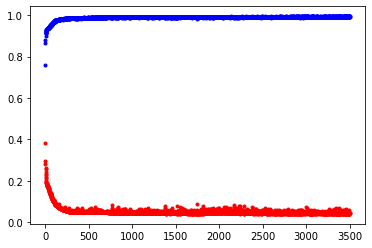

In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import pandas as pd
import numpy 
import tensorflow as tf


from keras.callbacks import ModelCheckpoint
import os

seed = 0
numpy.random.seed(seed)
tf.random.set_seed(seed)

df_pre = pd.read_csv('C:\\Users\\user\\study1\\머신러닝\\data\\wine.csv', header = None)
df = df_pre.sample(frac=1) # frac의 비율만큼 sample데이터로 취한다.

dataset = df.values

X = dataset[:,0:12]
Y = dataset[:,12].astype(float)

model = Sequential()
model.add(Dense(30,input_dim = 12,activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy',
             optimizer = 'adam',
             metrics = ['accuracy'])


# 모델 실행 및 저장
# 0.33%의 데이터를 검증용으로 사용
history = model.fit(X, Y, validation_split = 0.33, epochs = 3500, batch_size = 500)

# y_vloss에 테스트셋으로 실험결과의 오차 값을 저장
y_vloss = history.history['val_loss']

#y_acc에 학습셋으로 측정한 정확도의 값을 저장
y_acc = history.history['accuracy']

# x값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = numpy.arange (len(y_acc))
plt.plot(x_len, y_vloss, 'o', c ='red', markersize = 3)
plt.plot(x_len, y_acc, 'o', c = 'blue', markersize = 3)

plt.show()



- Keras에서는 모델 학습을 위해 fit() 함수를 사용합니다. 이 때, 리턴값으로 학습 이력(History) 정보를 리턴합니다. 여기에는 다음과 같은 항목들이 포함되어 있습니다.

- 아래 항목들은 매 epoch 마다의 값들이 저장되어 있습니다.

- loss : 학습 손실값 (에러율, 오차)
- acc : 학습 정확도
- val_loss : 검증 손실값 (에러율,오차)
- val_acc : 검증 정확도


- 파란선은 학습셋 정확도
- 빨간선은 테스트셋 오차
- 검증데이터로 과적합을 찾아낼 수 있음.
- 학습셋의 정확도는 시간이 흐를수록 좋아짐
- 테스트 결과는 어느 정도 이상 시간이 흐르면 더 나아지지 않는 것(변곡점)을 그래프로 확인할 수 있다.
- 이 변곡점이 과적합이 일어나고 있다는 신호!
- 학습을 멈추게 하면 더 이상 과적합이 이뤄지지 않을 것
